In [ ]:
import tensorflow as tf

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
len(tf.config.list_physical_devices('GPU'))

1

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import random
import cv2
import os
from imutils import paths
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/Dataset/RAW/dataset_halfSecondWindow.csv')
df

id  time  activityrecognition#0  activityrecognition#1  \
0      156661     3                    NaN                     62   
1      156662     4                    NaN                     62   
2      156663     5                    NaN                     62   
3      156664     6                    NaN                     62   
4      156665     7                    NaN                     62   
...       ...   ...                    ...                    ...   
62580   82695  4066                    NaN                     51   
62581   77608   604                    NaN                    100   
62582   85219  1341                    NaN                    100   
62583   69368  1186                    NaN                     90   
62584   84508   630                    NaN                    100   

       android.sensor.accelerometer#mean  android.sensor.accelerometer#min  \
0                              10.053802                          4.328630   
1                              10.687402                          6.373194   
2                              11.816800                          4.817410   
3                               9.401312                          6.124588   
4                              10.389851                          5.313790   
...                                  ...                               ...   
62580                          10.105329                         10.089159   
62581                           9.544118                          9.544118   
62582                          14.258467                         14.258467   
62583                          10.726491                         10.726491   
62584                          15.892297                         15.892297   

       android.sensor.accelerometer#max  android.sensor.accelerometer#std  \
0                             14.419712                          2.359507   
1                             16.329818                          2.912315   
2                             16.854629                          3.199759   
3                             12.230792                          1.572354   
4                             38.533453                          5.426978   
...                                 ...                               ...   
62580                         10.135641                          0.026270   
62581                          9.544118                         14.491194   
62582                         14.258467                          0.829544   
62583                         10.726491                          7.089701   
62584                         15.892297                          3.606631   

       android.sensor.game_rotation_vector#mean  \
0                                      0.629076   
1                                      0.577839   
2                                      0.651511   
3                                      0.713226   
4                                      0.707375   
...                                         ...   
62580                                  0.834765   
62581                                  0.965309   
62582                                  0.773370   
62583                                  0.789832   
62584                                  0.838142   

       android.sensor.game_rotation_vector#min  ...  sound#mean  sound#min  \
0                                     0.436463  ...         NaN        NaN   
1                                     0.376494  ...         NaN        NaN   
2                                     0.585485  ...         NaN        NaN   
3                                     0.693072  ...         NaN        NaN   
4                                     0.684707  ...         NaN        NaN   
...                                        ...  ...         ...        ...   
62580                                 0.834765  ...   89.761985  89.761985   
62581                                 0.965309  ...   89.747010  89.747010   
62582

In [ ]:
column_lst = list(df.columns)
mostly_null = []
partially_null = []
no_null = []

In [ ]:
print(column_lst)

['id', 'time', 'activityrecognition#0', 'activityrecognition#1', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.game_rotation_vector#std', 'android.sensor.gravity#mean', 'android.sensor.gravity#min', 'android.sensor.gravity#max', 'android.sensor.gravity#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.gyroscope_uncalibrated#min', 'android.sensor.gyroscope_uncalibrated#max', 'android.sensor.gyroscope_uncalibrated#std', 'android.sensor.light#mean', 'android.sensor.light#min', 'android.sensor.light#max', 'android.sensor.light#std', 'android.sensor.linear_acceleration#mean', 'android.sensor.linear_acceler

In [ ]:
for i in column_lst:
    percentage = (df[i].isnull().sum()*100)/62585
    if percentage >= 60:
        mostly_null.append(i)
    elif df[i].isnull().sum() > 0:
        partially_null.append(i)
    elif df[i].isnull().sum() == 0:
        no_null.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 62585")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: id
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: time
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  62585 out of 62585
Missing percentage:100.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  2 out of 62585
Missing percentage:0.003195653910681473%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  8585 out of 62585
Missing percentage:13.717344411600223%

Feat

In [ ]:
if len(mostly_null)+len(partially_null)+len(no_null) == len(column_lst):
    print("True")
else:
    print("False")

True


In [ ]:
mostly_null

['activityrecognition#0',
 'android.sensor.light#std',
 'android.sensor.pressure#mean',
 'android.sensor.pressure#min',
 'android.sensor.pressure#max',
 'android.sensor.pressure#std',
 'android.sensor.proximity#mean',
 'android.sensor.proximity#min',
 'android.sensor.proximity#max',
 'android.sensor.proximity#std',
 'android.sensor.step_counter#mean',
 'android.sensor.step_counter#min',
 'android.sensor.step_counter#max',
 'android.sensor.step_counter#std',
 'sound#std',
 'speed#std']

In [ ]:
for i in mostly_null:
    df = df.drop([i], axis = 1)

In [ ]:
df = df.drop(['id'], axis = 1)

In [ ]:
partially_null

['android.sensor.accelerometer#std',
 'android.sensor.game_rotation_vector#mean',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#std',
 'android.sensor.gravity#mean',
 'android.sensor.gravity#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#std',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#mean',
 'android.sensor.light#min',
 'android.sensor.light#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#mean',
 'android.sensor.magnetic_field#min',
 'and

In [ ]:
for i in partially_null:
    print("Partially Null Feature Name:",i)
    print("Number of unique values: ",len(df[i].unique()),"and Number of missing values: ",df[i].isnull().sum())
    print()

Partially Null Feature Name: android.sensor.accelerometer#std
Number of unique values:  47810 and Number of missing values:  2

Partially Null Feature Name: android.sensor.game_rotation_vector#mean
Number of unique values:  35432 and Number of missing values:  8585

Partially Null Feature Name: android.sensor.game_rotation_vector#min
Number of unique values:  35031 and Number of missing values:  8585

Partially Null Feature Name: android.sensor.game_rotation_vector#max
Number of unique values:  35033 and Number of missing values:  8585

Partially Null Feature Name: android.sensor.game_rotation_vector#std
Number of unique values:  12710 and Number of missing values:  10662

Partially Null Feature Name: android.sensor.gravity#mean
Number of unique values:  8433 and Number of missing values:  5534

Partially Null Feature Name: android.sensor.gravity#min
Number of unique values:  8849 and Number of missing values:  5534

Partially Null Feature Name: android.sensor.gravity#max
Number of uni

In [ ]:
for i in partially_null:
    df[i] = df[i].fillna(0)

In [ ]:
newcolumns = list(df.columns)

In [ ]:
for i in newcolumns:
    
    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 62585")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#max
Number of missing values:  0 out of 62585
Missing percent

In [ ]:
df

time  activityrecognition#1  android.sensor.accelerometer#mean  \
0         3                     62                          10.053802   
1         4                     62                          10.687402   
2         5                     62                          11.816800   
3         6                     62                           9.401312   
4         7                     62                          10.389851   
...     ...                    ...                                ...   
62580  4066                     51                          10.105329   
62581   604                    100                           9.544118   
62582  1341                    100                          14.258467   
62583  1186                     90                          10.726491   
62584   630                    100                          15.892297   

       android.sensor.accelerometer#min  android.sensor.accelerometer#max  \
0                              4.328630                         14.419712   
1                              6.373194                         16.329818   
2                              4.817410                         16.854629   
3                              6.124588                         12.230792   
4                              5.313790                         38.533453   
...                                 ...                               ...   
62580                         10.089159                         10.135641   
62581                          9.544118                          9.544118   
62582                         14.258467                         14.258467   
62583                         10.726491                         10.726491   
62584                         15.892297                         15.892297   

       android.sensor.accelerometer#std  \
0                              2.359507   
1                              2.912315   
2                              3.199759   
3                              1.572354   
4                              5.426978   
...                                 ...   
62580                          0.026270   
62581                         14.491194   
62582                          0.829544   
62583                          7.089701   
62584                          3.606631   

       android.sensor.game_rotation_vector#mean  \
0                                      0.629076   
1                                      0.577839   
2                                      0.651511   
3                                      0.713226   
4                                      0.707375   
...                                         ...   
62580                                  0.834765   
62581                                  0.965309   
62582                                  0.773370   
62583                                  0.789832   
62584                                  0.838142   

       android.sensor.game_rotation_vector#min  \
0                                     0.436463   
1                                     0.376494   
2                                     0.585485   
3                                     0.693072   
4                                     0.684707   
...                                        ...   
62580                                 0.834765   
62581                                 0.965309   
62582                                 0.773370   
62583                                 0.789832   
62584                                 0.838142   

       android.sensor.game_rotation_vector#max  \
0                                     0.762086   
1                                     0.654833   
2                                     0.713222   
3                                     0.748520   
4                                     0.749263   
...                                        ...   
62580                                 0.834765   
62581                                 0.965309   
62582                   

In [ ]:
df['target'].unique()

array(['Bus', 'Car', 'Still', 'Train', 'Walking'], dtype=object)

In [ ]:
df['target'] = df['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}) 

In [ ]:
df = df.drop(['user'], axis = 1)

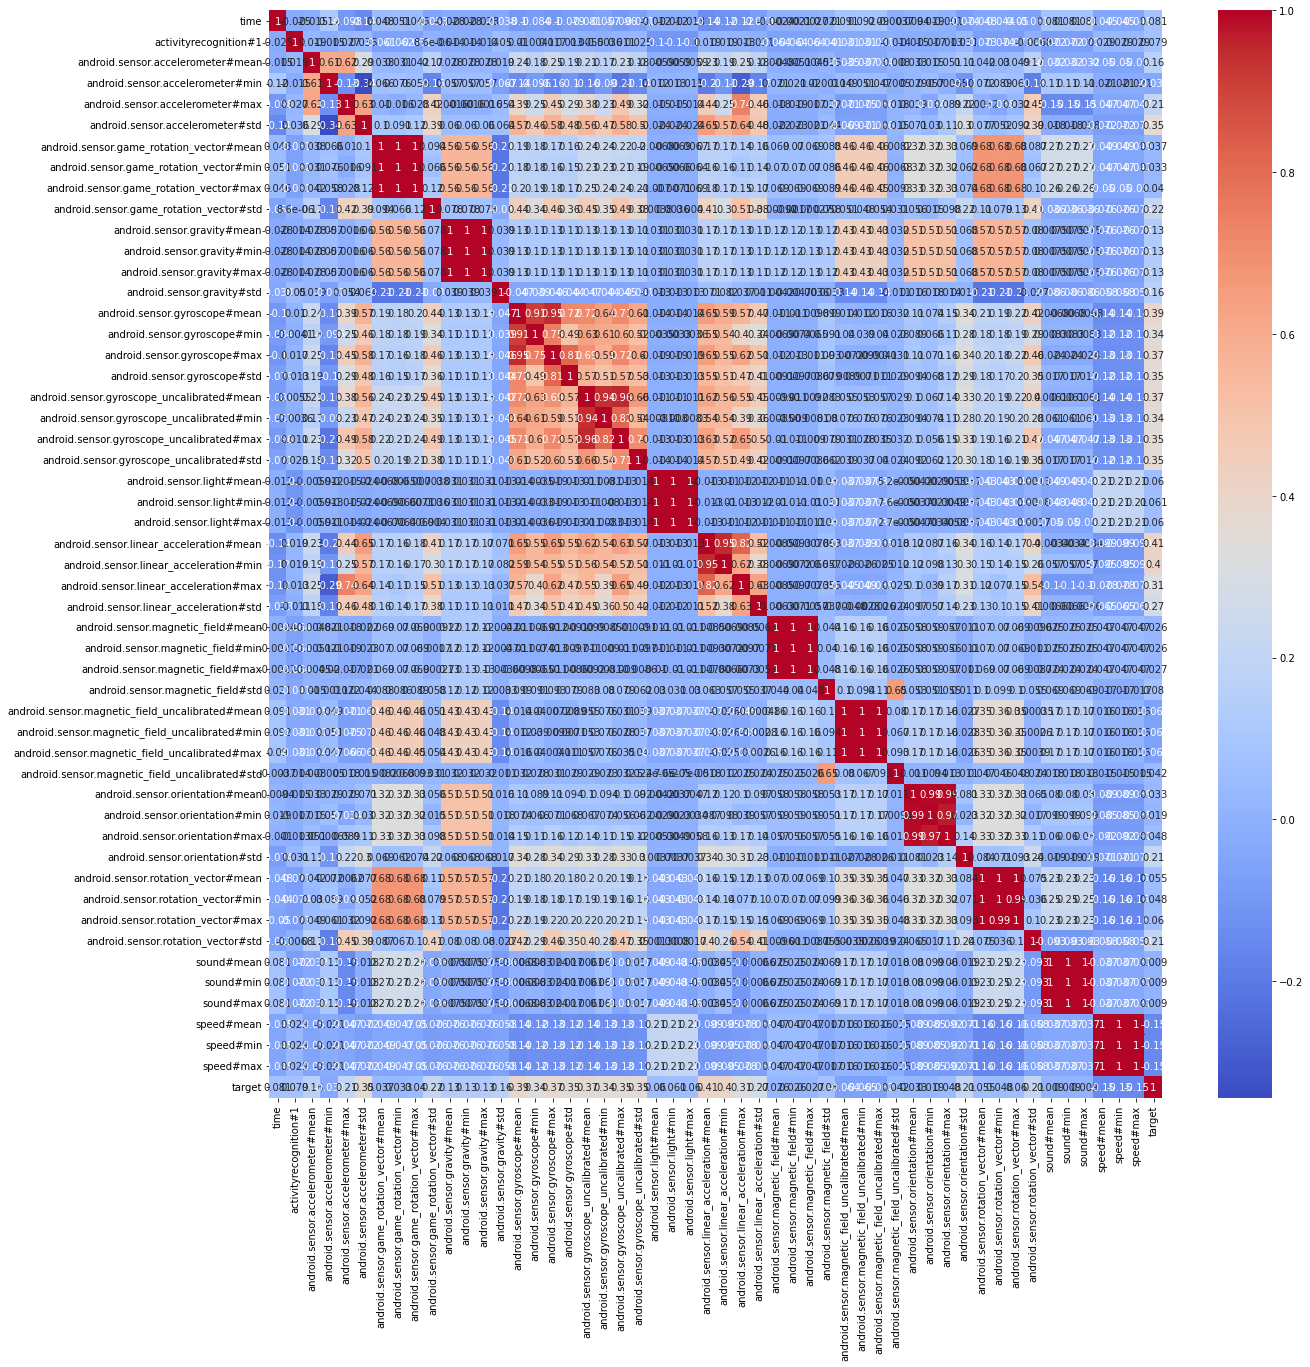

In [ ]:
corr = df.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

27

In [ ]:
corr_features

{'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#max',
 'android.sensor.light#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#min',
 'android.sensor.magnetic_field#max',
 'android.sensor.magnetic_field#min',
 'android.sensor.magnetic_field_uncalibrated#max',
 'android.sensor.magnetic_field_uncalibrated#min',
 'android.sensor.orientation#max',
 'android.sensor.orientation#min',
 'android.sensor.rotation_vector#max',
 'android.sensor.rotation_vector#min',
 'sound#max',
 'sound#min',
 'speed#max',
 'speed#min'}

In [ ]:
df1 = df.drop(corr_features,axis=1)

In [ ]:
df1

time  activityrecognition#1  android.sensor.accelerometer#mean  \
0         3                     62                          10.053802   
1         4                     62                          10.687402   
2         5                     62                          11.816800   
3         6                     62                           9.401312   
4         7                     62                          10.389851   
...     ...                    ...                                ...   
62580  4066                     51                          10.105329   
62581   604                    100                           9.544118   
62582  1341                    100                          14.258467   
62583  1186                     90                          10.726491   
62584   630                    100                          15.892297   

       android.sensor.accelerometer#min  android.sensor.accelerometer#max  \
0                              4.328630                         14.419712   
1                              6.373194                         16.329818   
2                              4.817410                         16.854629   
3                              6.124588                         12.230792   
4                              5.313790                         38.533453   
...                                 ...                               ...   
62580                         10.089159                         10.135641   
62581                          9.544118                          9.544118   
62582                         14.258467                         14.258467   
62583                         10.726491                         10.726491   
62584                         15.892297                         15.892297   

       android.sensor.accelerometer#std  \
0                              2.359507   
1                              2.912315   
2                              3.199759   
3                              1.572354   
4                              5.426978   
...                                 ...   
62580                          0.026270   
62581                         14.491194   
62582                          0.829544   
62583                          7.089701   
62584                          3.606631   

       android.sensor.game_rotation_vector#mean  \
0                                      0.629076   
1                                      0.577839   
2                                      0.651511   
3                                      0.713226   
4                                      0.707375   
...                                         ...   
62580                                  0.834765   
62581                                  0.965309   
62582                                  0.773370   
62583                                  0.789832   
62584                                  0.838142   

       android.sensor.game_rotation_vector#std  android.sensor.gravity#mean  \
0                                     0.114439                     9.806645   
1                                     0.079211                     9.806640   
2                                     0.033566                     9.806636   
3                                     0.014745                     9.806635   
4                                     0.018754                     9.806633   
...                                        ...                          ...   
62580                                 0.000162                     9.806650   
62581                                 0.012192                     9.806650   
62582                                 0.014168                     9.806650   
62583                                 0.005423                     9.806650   
62584                                 0.006532                     9.806650   

       android.sensor.gravity#std  ...  android.sensor.magnetic_field#std  \
0                    3.800000e-06  ...           

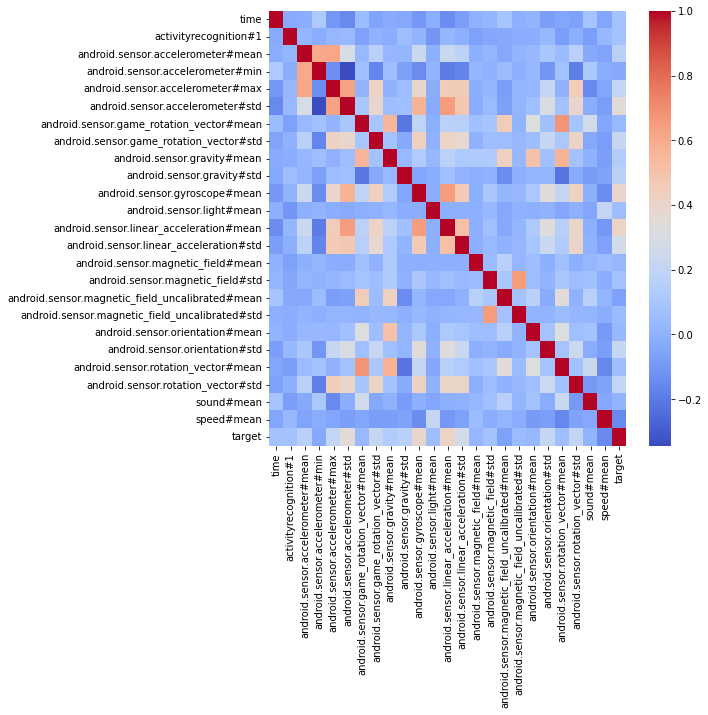

In [ ]:
corr = df1.corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62585 entries, 0 to 62584
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   time                                             62585 non-null  int64  
 1   activityrecognition#1                            62585 non-null  int64  
 2   android.sensor.accelerometer#mean                62585 non-null  float64
 3   android.sensor.accelerometer#min                 62585 non-null  float64
 4   android.sensor.accelerometer#max                 62585 non-null  float64
 5   android.sensor.accelerometer#std                 62585 non-null  float64
 6   android.sensor.game_rotation_vector#mean         62585 non-null  float64
 7   android.sensor.game_rotation_vector#std          62585 non-null  float64
 8   android.sensor.gravity#mean                      62585 non-null  float64
 9   android.sensor.gravity#std  

In [ ]:
final_df = df1

In [ ]:
final_df

time  activityrecognition#1  android.sensor.accelerometer#mean  \
0         3                     62                          10.053802   
1         4                     62                          10.687402   
2         5                     62                          11.816800   
3         6                     62                           9.401312   
4         7                     62                          10.389851   
...     ...                    ...                                ...   
62580  4066                     51                          10.105329   
62581   604                    100                           9.544118   
62582  1341                    100                          14.258467   
62583  1186                     90                          10.726491   
62584   630                    100                          15.892297   

       android.sensor.accelerometer#min  android.sensor.accelerometer#max  \
0                              4.328630                         14.419712   
1                              6.373194                         16.329818   
2                              4.817410                         16.854629   
3                              6.124588                         12.230792   
4                              5.313790                         38.533453   
...                                 ...                               ...   
62580                         10.089159                         10.135641   
62581                          9.544118                          9.544118   
62582                         14.258467                         14.258467   
62583                         10.726491                         10.726491   
62584                         15.892297                         15.892297   

       android.sensor.accelerometer#std  \
0                              2.359507   
1                              2.912315   
2                              3.199759   
3                              1.572354   
4                              5.426978   
...                                 ...   
62580                          0.026270   
62581                         14.491194   
62582                          0.829544   
62583                          7.089701   
62584                          3.606631   

       android.sensor.game_rotation_vector#mean  \
0                                      0.629076   
1                                      0.577839   
2                                      0.651511   
3                                      0.713226   
4                                      0.707375   
...                                         ...   
62580                                  0.834765   
62581                                  0.965309   
62582                                  0.773370   
62583                                  0.789832   
62584                                  0.838142   

       android.sensor.game_rotation_vector#std  android.sensor.gravity#mean  \
0                                     0.114439                     9.806645   
1                                     0.079211                     9.806640   
2                                     0.033566                     9.806636   
3                                     0.014745                     9.806635   
4                                     0.018754                     9.806633   
...                                        ...                          ...   
62580                                 0.000162                     9.806650   
62581                                 0.012192                     9.806650   
62582                                 0.014168                     9.806650   
62583                                 0.005423                     9.806650   
62584                                 0.006532                     9.806650   

       android.sensor.gravity#std  ...  android.sensor.magnetic_field#std  \
0                    3.800000e-06  ...           

In [ ]:
X = final_df.iloc[:,0:24] 
y = final_df.iloc[:,24]

In [ ]:
X

time  activityrecognition#1  android.sensor.accelerometer#mean  \
0         3                     62                          10.053802   
1         4                     62                          10.687402   
2         5                     62                          11.816800   
3         6                     62                           9.401312   
4         7                     62                          10.389851   
...     ...                    ...                                ...   
62580  4066                     51                          10.105329   
62581   604                    100                           9.544118   
62582  1341                    100                          14.258467   
62583  1186                     90                          10.726491   
62584   630                    100                          15.892297   

       android.sensor.accelerometer#min  android.sensor.accelerometer#max  \
0                              4.328630                         14.419712   
1                              6.373194                         16.329818   
2                              4.817410                         16.854629   
3                              6.124588                         12.230792   
4                              5.313790                         38.533453   
...                                 ...                               ...   
62580                         10.089159                         10.135641   
62581                          9.544118                          9.544118   
62582                         14.258467                         14.258467   
62583                         10.726491                         10.726491   
62584                         15.892297                         15.892297   

       android.sensor.accelerometer#std  \
0                              2.359507   
1                              2.912315   
2                              3.199759   
3                              1.572354   
4                              5.426978   
...                                 ...   
62580                          0.026270   
62581                         14.491194   
62582                          0.829544   
62583                          7.089701   
62584                          3.606631   

       android.sensor.game_rotation_vector#mean  \
0                                      0.629076   
1                                      0.577839   
2                                      0.651511   
3                                      0.713226   
4                                      0.707375   
...                                         ...   
62580                                  0.834765   
62581                                  0.965309   
62582                                  0.773370   
62583                                  0.789832   
62584                                  0.838142   

       android.sensor.game_rotation_vector#std  android.sensor.gravity#mean  \
0                                     0.114439                     9.806645   
1                                     0.079211                     9.806640   
2                                     0.033566                     9.806636   
3                                     0.014745                     9.806635   
4                                     0.018754                     9.806633   
...                                        ...                          ...   
62580                                 0.000162                     9.806650   
62581                                 0.012192                     9.806650   
62582                                 0.014168                     9.806650   
62583                                 0.005423                     9.806650   
62584                                 0.006532                     9.806650   

       android.sensor.gravity#std  ...  android.sensor.magnetic_field#mean  \
0                    3.800000e-06  ...          

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62580    4
62581    4
62582    4
62583    4
62584    4
Name: target, Length: 62585, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_scaled,y,test_size=0.20)

In [ ]:
y_train.shape

(50068,)

In [ ]:
from re import L

def create_clients(feature_list, label_list, num_clients=5, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as 
                data shards - tuple of features and label lists.
        args: 
            feature_list: a list of numpy arrays of training features
            label_list:a list of binarized labels for each feature
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1 
            
    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    print(len(feature_list))
    print(len(label_list))
    data = list(zip(feature_list, label_list))
    print(len(data))
    random.shuffle(data)
    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [ ]:
X_train.shape

(50068, 24)

In [ ]:
#create clients
clients = create_clients(X_train, y_train, num_clients=5, initial='client')

50068
50068
50068


In [ ]:
len(clients['client_3'])

10013

In [ ]:
def batch_data(data_shard, bs=32):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [ ]:

#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)
    
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [ ]:
class SimpleMLP:
    @staticmethod
    def build(shape, classes):
        model = Sequential()
        model.add(Dense(256, input_shape=(24,)))
        model.add(Activation("relu"))
        model.add(Dropout(0.45))
        model.add(Dense(256))
        model.add(Activation("relu"))
        model.add(Dropout(0.45))
        model.add(Dense(5))
        model.add(Activation("softmax"))
        return model

In [ ]:

lr = 0.01 
comms_round = 200
loss='sparse_categorical_crossentropy'
metrics = ['sparse_categorical_accuracy']
optimizer = SGD(learning_rate=lr, 
                decay=lr / comms_round, 
                momentum=0.9)  

In [ ]:
from sklearn.metrics import confusion_matrix
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    y_pred = []
    cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    c1 = tf.argmax(logits, axis=1).numpy()
    for i in range(len(c1)):
        y_pred.append(c1[i])

    y_pred = np.array(y_pred)

    print("y_pred =", y_pred)
    loss = cce(Y_test, logits)
    print("y_test =", Y_test)
    acc = accuracy_score(y_pred, Y_test)
    print(y_pred.shape)
    print(Y_test.shape)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    cf=classification_report(Y_test,y_pred)
    print(cf)

    sentiment_classes = ['Bus', 'Car', 'Still', 'Train', 'Walking']
    
    cm = confusion_matrix(np.array(Y_test), y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
    return acc, loss

392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 0 | global_acc: 58.065% | global_loss: 1.4778841733932495
              precision    recall  f1-score   support

           0       0.47      0.54      0.50      2490
           1       0.61      0.68      0.64      2546
           2       0.57      0.80      0.67      2536
           3       0.28      0.11      0.15      2416
           4       0.82      0.75      0.78      2529

    accuracy                           0.58     12517
   macro avg       0.55      0.58      0.55     12517
weighted avg       0.55      0.58      0.55     12517

392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 1 | global_acc: 68.179% | global_loss: 1.3484431505203247
              precision    recall  f1

<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 21 | global_acc: 84.253% | global_loss: 1.116508960723877
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      2490
           1       0.91      0.80      0.85      2546
           2       0.86      0.84      0.85      2536
           3       0.79      0.77      0.78      2416
           4       0.92      0.93      0.92      2529

    accuracy                           0.84     12517
   macro avg       0.85      0.84      0.84     12517
weighted avg       0.85      0.84      0.84     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 22 | global_acc: 84.062% | global_loss: 1.1134330034255981
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      2490
           1       0.92      0.80      0.85      2546
           2       0.83      0.84      0.84      2536
           3       0.79      0.76      0.78      2416
           4       0.92      0.93      0.92      2529

    accuracy                           0.84     12517
   macro avg       0.84      0.84      0.84     12517
weighted avg       0.84      0.84      0.84     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 23 | global_acc: 84.669% | global_loss: 1.1125247478485107
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2490
           1       0.92      0.80      0.86      2546
           2       0.82      0.87      0.85      2536
           3       0.80      0.76      0.78      2416
           4       0.93      0.92      0.93      2529

    accuracy                           0.85     12517
   macro avg       0.85      0.85      0.85     12517
weighted avg       0.85      0.85      0.85     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 24 | global_acc: 84.485% | global_loss: 1.1128827333450317
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      2490
           1       0.93      0.79      0.86      2546
           2       0.85      0.85      0.85      2536
           3       0.80      0.77      0.78      2416
           4       0.91      0.93      0.92      2529

    accuracy                           0.84     12517
   macro avg       0.85      0.84      0.84     12517
weighted avg       0.85      0.84      0.85     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 25 | global_acc: 84.485% | global_loss: 1.113106608390808
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      2490
           1       0.92      0.81      0.86      2546
           2       0.87      0.82      0.85      2536
           3       0.80      0.76      0.78      2416
           4       0.92      0.93      0.93      2529

    accuracy                           0.84     12517
   macro avg       0.85      0.84      0.84     12517
weighted avg       0.85      0.84      0.85     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 26 | global_acc: 85.316% | global_loss: 1.10849130153656
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2490
           1       0.91      0.82      0.86      2546
           2       0.84      0.86      0.85      2536
           3       0.80      0.80      0.80      2416
           4       0.93      0.92      0.92      2529

    accuracy                           0.85     12517
   macro avg       0.85      0.85      0.85     12517
weighted avg       0.86      0.85      0.85     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 27 | global_acc: 85.348% | global_loss: 1.1056910753250122
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      2490
           1       0.92      0.81      0.86      2546
           2       0.84      0.86      0.85      2536
           3       0.80      0.79      0.79      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.85     12517
   macro avg       0.86      0.85      0.85     12517
weighted avg       0.86      0.85      0.85     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 28 | global_acc: 85.260% | global_loss: 1.1058640480041504
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      2490
           1       0.92      0.82      0.87      2546
           2       0.85      0.86      0.85      2536
           3       0.80      0.78      0.79      2416
           4       0.94      0.92      0.93      2529

    accuracy                           0.85     12517
   macro avg       0.86      0.85      0.85     12517
weighted avg       0.86      0.85      0.85     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 29 | global_acc: 85.204% | global_loss: 1.1058180332183838
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      2490
           1       0.93      0.81      0.86      2546
           2       0.81      0.89      0.85      2536
           3       0.83      0.74      0.78      2416
           4       0.94      0.92      0.93      2529

    accuracy                           0.85     12517
   macro avg       0.86      0.85      0.85     12517
weighted avg       0.86      0.85      0.85     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 30 | global_acc: 85.484% | global_loss: 1.101937174797058
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2490
           1       0.93      0.81      0.87      2546
           2       0.85      0.86      0.85      2536
           3       0.79      0.81      0.80      2416
           4       0.90      0.94      0.92      2529

    accuracy                           0.85     12517
   macro avg       0.86      0.85      0.85     12517
weighted avg       0.86      0.85      0.85     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 31 | global_acc: 85.859% | global_loss: 1.1011552810668945
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      2490
           1       0.91      0.84      0.87      2546
           2       0.83      0.88      0.85      2536
           3       0.83      0.77      0.80      2416
           4       0.92      0.93      0.93      2529

    accuracy                           0.86     12517
   macro avg       0.86      0.86      0.86     12517
weighted avg       0.86      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 32 | global_acc: 85.004% | global_loss: 1.1027530431747437
              precision    recall  f1-score   support

           0       0.75      0.89      0.82      2490
           1       0.92      0.83      0.87      2546
           2       0.85      0.85      0.85      2536
           3       0.82      0.75      0.78      2416
           4       0.92      0.93      0.92      2529

    accuracy                           0.85     12517
   macro avg       0.85      0.85      0.85     12517
weighted avg       0.85      0.85      0.85     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 33 | global_acc: 85.979% | global_loss: 1.0996477603912354
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      2490
           1       0.92      0.84      0.88      2546
           2       0.86      0.85      0.85      2536
           3       0.79      0.82      0.80      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.86     12517
   macro avg       0.86      0.86      0.86     12517
weighted avg       0.86      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 34 | global_acc: 85.811% | global_loss: 1.0986077785491943
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2490
           1       0.92      0.84      0.88      2546
           2       0.86      0.86      0.86      2536
           3       0.81      0.78      0.79      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.86     12517
   macro avg       0.86      0.86      0.86     12517
weighted avg       0.86      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 35 | global_acc: 85.955% | global_loss: 1.0959222316741943
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2490
           1       0.92      0.83      0.87      2546
           2       0.86      0.85      0.86      2536
           3       0.79      0.81      0.80      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.86     12517
   macro avg       0.86      0.86      0.86     12517
weighted avg       0.86      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 36 | global_acc: 85.987% | global_loss: 1.09578275680542
              precision    recall  f1-score   support

           0       0.79      0.89      0.83      2490
           1       0.93      0.83      0.88      2546
           2       0.87      0.85      0.86      2536
           3       0.80      0.80      0.80      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.86     12517
   macro avg       0.86      0.86      0.86     12517
weighted avg       0.86      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 37 | global_acc: 86.426% | global_loss: 1.0943489074707031
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2490
           1       0.93      0.82      0.87      2546
           2       0.84      0.88      0.86      2536
           3       0.79      0.83      0.81      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.86     12517
   macro avg       0.87      0.86      0.86     12517
weighted avg       0.87      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 38 | global_acc: 86.379% | global_loss: 1.0930413007736206
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      2490
           1       0.93      0.84      0.88      2546
           2       0.85      0.88      0.86      2536
           3       0.81      0.80      0.80      2416
           4       0.91      0.94      0.93      2529

    accuracy                           0.86     12517
   macro avg       0.86      0.86      0.86     12517
weighted avg       0.87      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 39 | global_acc: 86.658% | global_loss: 1.0935040712356567
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2490
           1       0.92      0.85      0.88      2546
           2       0.86      0.86      0.86      2536
           3       0.80      0.82      0.81      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 40 | global_acc: 86.402% | global_loss: 1.091500163078308
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      2490
           1       0.93      0.84      0.88      2546
           2       0.85      0.87      0.86      2536
           3       0.82      0.79      0.81      2416
           4       0.91      0.94      0.92      2529

    accuracy                           0.86     12517
   macro avg       0.87      0.86      0.86     12517
weighted avg       0.87      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 41 | global_acc: 86.291% | global_loss: 1.092049241065979
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2490
           1       0.93      0.83      0.88      2546
           2       0.85      0.88      0.86      2536
           3       0.81      0.80      0.80      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.86     12517
   macro avg       0.87      0.86      0.86     12517
weighted avg       0.87      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 42 | global_acc: 86.682% | global_loss: 1.0900527238845825
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2490
           1       0.93      0.84      0.88      2546
           2       0.86      0.86      0.86      2536
           3       0.79      0.84      0.81      2416
           4       0.92      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 43 | global_acc: 86.522% | global_loss: 1.0894252061843872
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      2490
           1       0.92      0.85      0.89      2546
           2       0.86      0.86      0.86      2536
           3       0.81      0.80      0.80      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.86      0.86     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 44 | global_acc: 86.946% | global_loss: 1.087423324584961
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2490
           1       0.93      0.84      0.88      2546
           2       0.84      0.89      0.87      2536
           3       0.81      0.82      0.82      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 45 | global_acc: 86.650% | global_loss: 1.0869752168655396
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2490
           1       0.93      0.85      0.88      2546
           2       0.86      0.86      0.86      2536
           3       0.80      0.81      0.81      2416
           4       0.92      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 46 | global_acc: 86.442% | global_loss: 1.088268518447876
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2490
           1       0.92      0.85      0.88      2546
           2       0.90      0.83      0.86      2536
           3       0.79      0.82      0.80      2416
           4       0.92      0.93      0.93      2529

    accuracy                           0.86     12517
   macro avg       0.87      0.86      0.86     12517
weighted avg       0.87      0.86      0.86     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 47 | global_acc: 86.906% | global_loss: 1.0872914791107178
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2490
           1       0.92      0.85      0.89      2546
           2       0.86      0.86      0.86      2536
           3       0.81      0.82      0.81      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 48 | global_acc: 86.890% | global_loss: 1.0864156484603882
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2490
           1       0.93      0.85      0.89      2546
           2       0.88      0.85      0.87      2536
           3       0.80      0.83      0.81      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 49 | global_acc: 86.962% | global_loss: 1.0839327573776245
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2490
           1       0.92      0.86      0.89      2546
           2       0.87      0.86      0.87      2536
           3       0.79      0.84      0.81      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 50 | global_acc: 86.858% | global_loss: 1.0837359428405762
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2490
           1       0.93      0.85      0.89      2546
           2       0.88      0.85      0.87      2536
           3       0.80      0.83      0.81      2416
           4       0.91      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 51 | global_acc: 87.098% | global_loss: 1.0838979482650757
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2490
           1       0.93      0.85      0.89      2546
           2       0.87      0.86      0.87      2536
           3       0.81      0.83      0.82      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 52 | global_acc: 87.066% | global_loss: 1.0823583602905273
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2490
           1       0.93      0.85      0.89      2546
           2       0.87      0.87      0.87      2536
           3       0.81      0.82      0.81      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 53 | global_acc: 86.834% | global_loss: 1.0822248458862305
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2490
           1       0.93      0.84      0.88      2546
           2       0.86      0.88      0.87      2536
           3       0.83      0.80      0.81      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 54 | global_acc: 87.305% | global_loss: 1.0815576314926147
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2490
           1       0.92      0.86      0.89      2546
           2       0.88      0.86      0.87      2536
           3       0.81      0.83      0.82      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 55 | global_acc: 87.082% | global_loss: 1.0810929536819458
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2490
           1       0.93      0.85      0.89      2546
           2       0.89      0.85      0.87      2536
           3       0.79      0.84      0.82      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 56 | global_acc: 87.122% | global_loss: 1.0797216892242432
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2490
           1       0.93      0.86      0.89      2546
           2       0.87      0.87      0.87      2536
           3       0.82      0.81      0.81      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 57 | global_acc: 87.393% | global_loss: 1.0781537294387817
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      2490
           1       0.93      0.86      0.89      2546
           2       0.87      0.86      0.87      2536
           3       0.81      0.83      0.82      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.88      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 58 | global_acc: 87.361% | global_loss: 1.0791553258895874
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2490
           1       0.93      0.86      0.89      2546
           2       0.87      0.88      0.87      2536
           3       0.82      0.82      0.82      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 59 | global_acc: 87.689% | global_loss: 1.0782774686813354
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2490
           1       0.93      0.86      0.89      2546
           2       0.86      0.88      0.87      2536
           3       0.81      0.84      0.83      2416
           4       0.94      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 60 | global_acc: 87.417% | global_loss: 1.0782779455184937
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      2490
           1       0.93      0.85      0.89      2546
           2       0.88      0.87      0.87      2536
           3       0.80      0.84      0.82      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.88      0.87      0.87     12517
weighted avg       0.88      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 61 | global_acc: 87.313% | global_loss: 1.0773074626922607
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2490
           1       0.93      0.85      0.89      2546
           2       0.86      0.88      0.87      2536
           3       0.82      0.81      0.82      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.87      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 62 | global_acc: 87.513% | global_loss: 1.0780785083770752
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2490
           1       0.93      0.85      0.89      2546
           2       0.89      0.86      0.87      2536
           3       0.79      0.86      0.82      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.87      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 63 | global_acc: 87.393% | global_loss: 1.0769098997116089
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2490
           1       0.93      0.86      0.89      2546
           2       0.88      0.87      0.87      2536
           3       0.82      0.82      0.82      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.87      0.87      0.87     12517
weighted avg       0.88      0.87      0.87     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 64 | global_acc: 87.689% | global_loss: 1.0756665468215942
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2490
           1       0.93      0.86      0.89      2546
           2       0.88      0.87      0.87      2536
           3       0.80      0.85      0.82      2416
           4       0.94      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 65 | global_acc: 87.497% | global_loss: 1.075433611869812
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2490
           1       0.92      0.86      0.89      2546
           2       0.88      0.87      0.87      2536
           3       0.81      0.83      0.82      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.88      0.87      0.87     12517
weighted avg       0.88      0.87      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 66 | global_acc: 87.713% | global_loss: 1.0738271474838257
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2490
           1       0.93      0.87      0.90      2546
           2       0.88      0.87      0.87      2536
           3       0.81      0.84      0.82      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 67 | global_acc: 87.473% | global_loss: 1.0756995677947998
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      2490
           1       0.93      0.86      0.89      2546
           2       0.90      0.85      0.87      2536
           3       0.80      0.84      0.82      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.87     12517
   macro avg       0.88      0.87      0.87     12517
weighted avg       0.88      0.87      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 68 | global_acc: 87.633% | global_loss: 1.0737433433532715
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      2490
           1       0.93      0.86      0.89      2546
           2       0.88      0.87      0.87      2536
           3       0.83      0.82      0.82      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 69 | global_acc: 87.713% | global_loss: 1.0727612972259521
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      2490
           1       0.92      0.87      0.90      2546
           2       0.88      0.87      0.87      2536
           3       0.82      0.83      0.83      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 70 | global_acc: 87.920% | global_loss: 1.0732852220535278
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2490
           1       0.93      0.87      0.90      2546
           2       0.87      0.88      0.87      2536
           3       0.84      0.82      0.83      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 71 | global_acc: 87.729% | global_loss: 1.0717887878417969
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2490
           1       0.93      0.86      0.90      2546
           2       0.88      0.87      0.88      2536
           3       0.81      0.83      0.82      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 72 | global_acc: 87.984% | global_loss: 1.0710642337799072
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2490
           1       0.93      0.87      0.90      2546
           2       0.88      0.88      0.88      2536
           3       0.82      0.84      0.83      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 73 | global_acc: 87.769% | global_loss: 1.071752905845642
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2490
           1       0.93      0.87      0.90      2546
           2       0.89      0.86      0.88      2536
           3       0.81      0.84      0.83      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 74 | global_acc: 88.168% | global_loss: 1.0701491832733154
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2490
           1       0.93      0.88      0.90      2546
           2       0.87      0.88      0.87      2536
           3       0.83      0.84      0.83      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 75 | global_acc: 87.944% | global_loss: 1.0700868368148804
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2490
           1       0.93      0.86      0.90      2546
           2       0.89      0.87      0.88      2536
           3       0.81      0.85      0.83      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 76 | global_acc: 88.104% | global_loss: 1.069693922996521
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.88      0.88      0.88      2536
           3       0.82      0.85      0.83      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 2ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 77 | global_acc: 87.888% | global_loss: 1.0705305337905884
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2490
           1       0.93      0.87      0.90      2546
           2       0.89      0.86      0.88      2536
           3       0.82      0.84      0.83      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 78 | global_acc: 88.080% | global_loss: 1.0694385766983032
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2490
           1       0.93      0.87      0.90      2546
           2       0.88      0.87      0.88      2536
           3       0.83      0.84      0.84      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 79 | global_acc: 87.912% | global_loss: 1.0676907300949097
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2490
           1       0.93      0.86      0.90      2546
           2       0.90      0.86      0.88      2536
           3       0.78      0.88      0.83      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 80 | global_acc: 88.088% | global_loss: 1.067425012588501
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2490
           1       0.94      0.86      0.90      2546
           2       0.87      0.88      0.87      2536
           3       0.80      0.86      0.83      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 81 | global_acc: 88.216% | global_loss: 1.06721031665802
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.93      0.86      0.90      2546
           2       0.88      0.88      0.88      2536
           3       0.82      0.85      0.84      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 82 | global_acc: 88.224% | global_loss: 1.068284273147583
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2490
           1       0.93      0.86      0.90      2546
           2       0.89      0.87      0.88      2536
           3       0.82      0.85      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 83 | global_acc: 88.320% | global_loss: 1.0671814680099487
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.88      0.88      0.88      2536
           3       0.82      0.85      0.83      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 84 | global_acc: 88.248% | global_loss: 1.065624475479126
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.87      0.88      0.88      2536
           3       0.82      0.84      0.83      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 85 | global_acc: 88.224% | global_loss: 1.0664784908294678
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.90      0.86      0.88      2536
           3       0.81      0.86      0.83      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 86 | global_acc: 88.208% | global_loss: 1.0660876035690308
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2490
           1       0.93      0.86      0.90      2546
           2       0.88      0.88      0.88      2536
           3       0.82      0.85      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 87 | global_acc: 88.088% | global_loss: 1.0655854940414429
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2490
           1       0.93      0.87      0.90      2546
           2       0.88      0.88      0.88      2536
           3       0.84      0.83      0.83      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 88 | global_acc: 88.256% | global_loss: 1.0651462078094482
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.89      0.87      0.88      2536
           3       0.80      0.87      0.83      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 89 | global_acc: 88.184% | global_loss: 1.0647826194763184
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2490
           1       0.93      0.87      0.90      2546
           2       0.88      0.87      0.88      2536
           3       0.82      0.85      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.88      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 90 | global_acc: 88.480% | global_loss: 1.064404010772705
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.92      0.88      0.90      2546
           2       0.88      0.88      0.88      2536
           3       0.83      0.84      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.89      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 91 | global_acc: 88.336% | global_loss: 1.0629332065582275
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.89      0.87      0.88      2536
           3       0.80      0.87      0.83      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.89      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 92 | global_acc: 88.336% | global_loss: 1.0633693933486938
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2490
           1       0.94      0.87      0.90      2546
           2       0.89      0.88      0.88      2536
           3       0.80      0.87      0.83      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.89      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 93 | global_acc: 88.480% | global_loss: 1.0635329484939575
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2490
           1       0.93      0.88      0.90      2546
           2       0.88      0.88      0.88      2536
           3       0.84      0.84      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.89      0.88      0.88     12517
weighted avg       0.89      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 94 | global_acc: 88.607% | global_loss: 1.063627004623413
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.90      0.87      0.88      2536
           3       0.81      0.86      0.84      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 95 | global_acc: 88.432% | global_loss: 1.062056541442871
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.89      0.88      0.88      2536
           3       0.81      0.86      0.83      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.89      0.88      0.88     12517
weighted avg       0.89      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 96 | global_acc: 88.568% | global_loss: 1.06296706199646
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.90      0.87      0.89      2536
           3       0.80      0.87      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 97 | global_acc: 88.416% | global_loss: 1.063530683517456
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2490
           1       0.92      0.89      0.90      2546
           2       0.90      0.86      0.88      2536
           3       0.82      0.85      0.83      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.88     12517
   macro avg       0.88      0.88      0.88     12517
weighted avg       0.89      0.88      0.88     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 98 | global_acc: 88.743% | global_loss: 1.0615239143371582
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.88      0.89      0.88      2536
           3       0.83      0.86      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 99 | global_acc: 88.647% | global_loss: 1.0603338479995728
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.93      0.88      0.90      2546
           2       0.89      0.88      0.88      2536
           3       0.82      0.86      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 100 | global_acc: 88.719% | global_loss: 1.060420274734497
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.87      0.89      0.88      2536
           3       0.84      0.85      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 2ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 101 | global_acc: 88.687% | global_loss: 1.061036467552185
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2490
           1       0.93      0.88      0.90      2546
           2       0.91      0.87      0.89      2536
           3       0.82      0.86      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 102 | global_acc: 88.592% | global_loss: 1.0601286888122559
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.93      0.87      0.90      2546
           2       0.89      0.88      0.88      2536
           3       0.82      0.87      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 103 | global_acc: 88.512% | global_loss: 1.059922218322754
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2490
           1       0.94      0.87      0.90      2546
           2       0.90      0.87      0.88      2536
           3       0.81      0.87      0.84      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.88      0.88     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 104 | global_acc: 88.671% | global_loss: 1.0596431493759155
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2490
           1       0.93      0.88      0.90      2546
           2       0.89      0.88      0.88      2536
           3       0.82      0.86      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 105 | global_acc: 88.711% | global_loss: 1.0595752000808716
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2490
           1       0.93      0.88      0.90      2546
           2       0.90      0.87      0.89      2536
           3       0.80      0.87      0.84      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 106 | global_acc: 88.711% | global_loss: 1.0587505102157593
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2490
           1       0.93      0.88      0.90      2546
           2       0.88      0.89      0.88      2536
           3       0.84      0.85      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 107 | global_acc: 88.759% | global_loss: 1.0589752197265625
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.87      0.90      2546
           2       0.88      0.88      0.88      2536
           3       0.82      0.87      0.84      2416
           4       0.93      0.93      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 108 | global_acc: 88.935% | global_loss: 1.0583454370498657
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2490
           1       0.93      0.88      0.90      2546
           2       0.89      0.88      0.89      2536
           3       0.82      0.87      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 109 | global_acc: 88.791% | global_loss: 1.0580554008483887
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2490
           1       0.93      0.87      0.90      2546
           2       0.89      0.88      0.88      2536
           3       0.82      0.87      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 110 | global_acc: 88.751% | global_loss: 1.0588417053222656
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2490
           1       0.93      0.88      0.90      2546
           2       0.89      0.88      0.89      2536
           3       0.83      0.85      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 111 | global_acc: 88.751% | global_loss: 1.0574232339859009
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2490
           1       0.93      0.88      0.90      2546
           2       0.90      0.87      0.89      2536
           3       0.82      0.86      0.84      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 112 | global_acc: 88.544% | global_loss: 1.0596154928207397
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2490
           1       0.93      0.88      0.90      2546
           2       0.92      0.86      0.89      2536
           3       0.81      0.86      0.83      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 113 | global_acc: 89.111% | global_loss: 1.0573604106903076
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.94      0.88      0.91      2546
           2       0.89      0.88      0.89      2536
           3       0.83      0.87      0.85      2416
           4       0.94      0.93      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 114 | global_acc: 88.975% | global_loss: 1.057234764099121
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.93      0.88      0.91      2546
           2       0.90      0.87      0.89      2536
           3       0.83      0.86      0.85      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 115 | global_acc: 88.799% | global_loss: 1.0574899911880493
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2490
           1       0.93      0.88      0.91      2546
           2       0.91      0.87      0.89      2536
           3       0.82      0.87      0.84      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 116 | global_acc: 89.191% | global_loss: 1.0562846660614014
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.88      0.90      0.89      2536
           3       0.85      0.85      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 117 | global_acc: 89.111% | global_loss: 1.0550841093063354
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.89      0.89      0.89      2536
           3       0.84      0.86      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 118 | global_acc: 89.031% | global_loss: 1.0562591552734375
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.89      0.89      0.89      2536
           3       0.84      0.85      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 119 | global_acc: 88.839% | global_loss: 1.0555485486984253
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2490
           1       0.93      0.87      0.90      2546
           2       0.90      0.88      0.89      2536
           3       0.81      0.87      0.84      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 120 | global_acc: 89.095% | global_loss: 1.0545843839645386
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.90      0.87      0.89      2536
           3       0.82      0.87      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 121 | global_acc: 89.151% | global_loss: 1.0555559396743774
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.90      0.88      0.89      2536
           3       0.83      0.88      0.85      2416
           4       0.92      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 122 | global_acc: 89.398% | global_loss: 1.0553808212280273
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2490
           1       0.94      0.88      0.91      2546
           2       0.89      0.90      0.89      2536
           3       0.83      0.87      0.85      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.90      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 123 | global_acc: 89.207% | global_loss: 1.0545473098754883
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.90      0.88      0.89      2536
           3       0.83      0.87      0.85      2416
           4       0.94      0.93      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 124 | global_acc: 89.295% | global_loss: 1.0552269220352173
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.88      0.90      2546
           2       0.88      0.90      0.89      2536
           3       0.84      0.87      0.86      2416
           4       0.94      0.94      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 2ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 125 | global_acc: 89.279% | global_loss: 1.0541393756866455
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.90      0.88      0.89      2536
           3       0.82      0.88      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 126 | global_acc: 89.079% | global_loss: 1.0545305013656616
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.88      0.89      2536
           3       0.84      0.86      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 127 | global_acc: 89.167% | global_loss: 1.0532996654510498
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.94      0.88      0.91      2546
           2       0.89      0.88      0.89      2536
           3       0.82      0.87      0.85      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 128 | global_acc: 89.287% | global_loss: 1.0535261631011963
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.87      0.89      2536
           3       0.83      0.88      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 129 | global_acc: 89.287% | global_loss: 1.053484559059143
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.91      0.87      0.89      2536
           3       0.81      0.88      0.85      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 130 | global_acc: 89.215% | global_loss: 1.05279541015625
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.89      0.88      0.89      2536
           3       0.83      0.87      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 131 | global_acc: 89.462% | global_loss: 1.0529406070709229
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.90      0.89      0.89      2536
           3       0.83      0.87      0.85      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.90      0.89      0.89     12517
weighted avg       0.90      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 132 | global_acc: 89.374% | global_loss: 1.0521924495697021
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.88      0.89      2536
           3       0.83      0.88      0.85      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.90      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 133 | global_acc: 89.263% | global_loss: 1.0521061420440674
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.90      0.88      0.89      2536
           3       0.82      0.88      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 134 | global_acc: 89.382% | global_loss: 1.053071141242981
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.88      0.89      2536
           3       0.84      0.87      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 135 | global_acc: 89.478% | global_loss: 1.050106406211853
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.89      0.90      0.89      2536
           3       0.84      0.87      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.90      0.89      0.89     12517
weighted avg       0.90      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 136 | global_acc: 89.398% | global_loss: 1.0512025356292725
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.88      0.89      2536
           3       0.83      0.88      0.85      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 137 | global_acc: 89.430% | global_loss: 1.0513306856155396
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.94      0.88      0.91      2546
           2       0.90      0.89      0.89      2536
           3       0.83      0.88      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.90      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 138 | global_acc: 89.366% | global_loss: 1.0509464740753174
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.91      0.87      0.89      2536
           3       0.82      0.88      0.85      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.90      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 139 | global_acc: 89.470% | global_loss: 1.050672173500061
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.91      0.88      0.89      2536
           3       0.82      0.89      0.85      2416
           4       0.94      0.93      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.90      0.89      0.89     12517
weighted avg       0.90      0.89      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 140 | global_acc: 89.430% | global_loss: 1.0510588884353638
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.90      0.89      0.89      2536
           3       0.85      0.87      0.86      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.90      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 141 | global_acc: 89.518% | global_loss: 1.0504337549209595
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.90      0.88      0.89      2536
           3       0.84      0.88      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.89     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 142 | global_acc: 89.574% | global_loss: 1.0510724782943726
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.91      0.89      0.90      2536
           3       0.84      0.88      0.86      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 2ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 143 | global_acc: 89.374% | global_loss: 1.0500863790512085
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.88      0.89      2536
           3       0.83      0.87      0.85      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.89     12517
   macro avg       0.89      0.89      0.89     12517
weighted avg       0.89      0.89      0.89     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 144 | global_acc: 89.550% | global_loss: 1.0502407550811768
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.94      0.88      0.91      2546
           2       0.90      0.88      0.89      2536
           3       0.84      0.88      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 145 | global_acc: 89.598% | global_loss: 1.0509847402572632
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.88      0.92      0.90      2536
           3       0.88      0.84      0.86      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 146 | global_acc: 89.566% | global_loss: 1.0495911836624146
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.88      0.89      2536
           3       0.84      0.87      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 147 | global_acc: 89.702% | global_loss: 1.049607753753662
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.91      0.89      0.90      2536
           3       0.84      0.88      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 148 | global_acc: 89.902% | global_loss: 1.0484592914581299
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.88      0.91      2546
           2       0.89      0.91      0.90      2536
           3       0.85      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 149 | global_acc: 89.870% | global_loss: 1.04839026927948
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.90      0.90      2536
           3       0.86      0.87      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 150 | global_acc: 89.702% | global_loss: 1.0493353605270386
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.89      0.90      2536
           3       0.84      0.88      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 151 | global_acc: 90.085% | global_loss: 1.0487840175628662
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.90      0.90      2536
           3       0.86      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 152 | global_acc: 89.774% | global_loss: 1.0478554964065552
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.89      0.90      2536
           3       0.84      0.89      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 153 | global_acc: 89.566% | global_loss: 1.0493849515914917
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.94      0.88      0.91      2546
           2       0.92      0.88      0.90      2536
           3       0.83      0.89      0.86      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 154 | global_acc: 90.077% | global_loss: 1.047625184059143
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.91      0.90      2536
           3       0.86      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 155 | global_acc: 89.718% | global_loss: 1.0482335090637207
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.88      0.90      2536
           3       0.84      0.88      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 156 | global_acc: 90.085% | global_loss: 1.0484684705734253
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.90      0.91      2536
           3       0.87      0.87      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 157 | global_acc: 90.173% | global_loss: 1.0466092824935913
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.89      0.91      0.90      2536
           3       0.87      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 158 | global_acc: 89.798% | global_loss: 1.048530101776123
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.88      0.90      2536
           3       0.84      0.88      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 159 | global_acc: 90.006% | global_loss: 1.0471851825714111
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.89      0.90      2536
           3       0.84      0.89      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 160 | global_acc: 90.046% | global_loss: 1.0469965934753418
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.89      0.90      2536
           3       0.84      0.89      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 161 | global_acc: 89.878% | global_loss: 1.0468658208847046
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.90      0.90      2536
           3       0.85      0.88      0.86      2416
           4       0.94      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 162 | global_acc: 89.926% | global_loss: 1.0471488237380981
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.89      0.90      2536
           3       0.85      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 163 | global_acc: 89.982% | global_loss: 1.0458128452301025
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.90      0.90      2536
           3       0.85      0.88      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 164 | global_acc: 90.325% | global_loss: 1.0466699600219727
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.92      0.91      2536
           3       0.88      0.87      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 165 | global_acc: 89.838% | global_loss: 1.0464049577713013
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.94      0.89      0.91      2546
           2       0.91      0.88      0.90      2536
           3       0.84      0.89      0.86      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 2ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 166 | global_acc: 90.189% | global_loss: 1.0462665557861328
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.90      0.90      2536
           3       0.85      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 167 | global_acc: 89.878% | global_loss: 1.0466474294662476
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.92      0.89      0.90      2536
           3       0.84      0.88      0.86      2416
           4       0.94      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 168 | global_acc: 90.165% | global_loss: 1.0450321435928345
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.90      0.90      2536
           3       0.85      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 2ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 169 | global_acc: 90.038% | global_loss: 1.0455563068389893
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2490
           1       0.93      0.90      0.91      2546
           2       0.91      0.89      0.90      2536
           3       0.85      0.88      0.87      2416
           4       0.93      0.94      0.93      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 170 | global_acc: 90.014% | global_loss: 1.0455490350723267
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.89      0.90      2536
           3       0.85      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 171 | global_acc: 90.245% | global_loss: 1.0453300476074219
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.88      0.93      0.91      2536
           3       0.88      0.86      0.87      2416
           4       0.94      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 172 | global_acc: 90.309% | global_loss: 1.0448375940322876
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.91      0.91      2536
           3       0.87      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 173 | global_acc: 90.277% | global_loss: 1.0454609394073486
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.91      0.90      0.91      2536
           3       0.85      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 2ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 174 | global_acc: 90.405% | global_loss: 1.044022798538208
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.91      0.91      2536
           3       0.86      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 175 | global_acc: 90.597% | global_loss: 1.0442028045654297
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.93      0.90      0.91      2546
           2       0.91      0.92      0.91      2536
           3       0.87      0.88      0.88      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.91     12517
   macro avg       0.91      0.91      0.91     12517
weighted avg       0.91      0.91      0.91     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 176 | global_acc: 90.237% | global_loss: 1.0434870719909668
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.90      0.91      0.90      2536
           3       0.85      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 177 | global_acc: 90.197% | global_loss: 1.0457546710968018
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2490
           1       0.93      0.90      0.92      2546
           2       0.93      0.89      0.91      2536
           3       0.84      0.88      0.86      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 178 | global_acc: 90.309% | global_loss: 1.0439988374710083
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.91      0.90      0.91      2536
           3       0.86      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 179 | global_acc: 90.405% | global_loss: 1.0436755418777466
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.90      0.91      0.91      2536
           3       0.86      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 2ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 180 | global_acc: 90.389% | global_loss: 1.0436760187149048
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.90      0.91      0.91      2536
           3       0.86      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 181 | global_acc: 90.101% | global_loss: 1.0441068410873413
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2490
           1       0.93      0.89      0.91      2546
           2       0.92      0.89      0.90      2536
           3       0.85      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 182 | global_acc: 90.269% | global_loss: 1.0429097414016724
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.91      0.90      0.90      2536
           3       0.85      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 183 | global_acc: 90.485% | global_loss: 1.043479084968567
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.90      0.92      0.91      2536
           3       0.87      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.91      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 184 | global_acc: 90.453% | global_loss: 1.0430957078933716
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.91      0.91      0.91      2536
           3       0.86      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.91      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 185 | global_acc: 90.373% | global_loss: 1.0430079698562622
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.91      0.91      0.91      2536
           3       0.86      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 186 | global_acc: 90.421% | global_loss: 1.0430930852890015
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.90      0.91      2546
           2       0.91      0.90      0.91      2536
           3       0.86      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 187 | global_acc: 90.285% | global_loss: 1.0419625043869019
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.90      0.91      2536
           3       0.86      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 188 | global_acc: 90.301% | global_loss: 1.0418572425842285
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.90      0.91      2546
           2       0.90      0.90      0.90      2536
           3       0.86      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 189 | global_acc: 90.373% | global_loss: 1.042066216468811
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.93      0.90      0.92      2546
           2       0.92      0.90      0.91      2536
           3       0.85      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [0 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 190 | global_acc: 90.269% | global_loss: 1.0415362119674683
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.91      0.91      2536
           3       0.86      0.89      0.87      2416
           4       0.94      0.93      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 191 | global_acc: 90.581% | global_loss: 1.041526198387146
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.90      0.92      0.91      2536
           3       0.87      0.89      0.88      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.91     12517
   macro avg       0.91      0.91      0.91     12517
weighted avg       0.91      0.91      0.91     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 192 | global_acc: 90.541% | global_loss: 1.0428518056869507
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2490
           1       0.93      0.90      0.92      2546
           2       0.92      0.91      0.91      2536
           3       0.87      0.88      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.91     12517
   macro avg       0.91      0.91      0.91     12517
weighted avg       0.91      0.91      0.91     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 193 | global_acc: 90.645% | global_loss: 1.0413633584976196
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.90      0.93      0.91      2536
           3       0.89      0.87      0.88      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.91     12517
   macro avg       0.91      0.91      0.91     12517
weighted avg       0.91      0.91      0.91     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 194 | global_acc: 90.693% | global_loss: 1.0417369604110718
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.93      0.90      0.92      2546
           2       0.91      0.91      0.91      2536
           3       0.87      0.89      0.88      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.91     12517
   macro avg       0.91      0.91      0.91     12517
weighted avg       0.91      0.91      0.91     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 195 | global_acc: 90.613% | global_loss: 1.041430950164795
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2490
           1       0.93      0.89      0.91      2546
           2       0.91      0.91      0.91      2536
           3       0.86      0.90      0.88      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.91     12517
   macro avg       0.91      0.91      0.91     12517
weighted avg       0.91      0.91      0.91     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 196 | global_acc: 90.613% | global_loss: 1.041599988937378
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.91      0.91      0.91      2536
           3       0.87      0.89      0.88      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.91     12517
   macro avg       0.91      0.91      0.91     12517
weighted avg       0.91      0.91      0.91     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 197 | global_acc: 90.421% | global_loss: 1.0419403314590454
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.94      0.89      0.91      2546
           2       0.92      0.90      0.91      2536
           3       0.85      0.90      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.91      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 1ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 198 | global_acc: 90.277% | global_loss: 1.0414735078811646
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.93      0.90      0.91      2546
           2       0.92      0.89      0.91      2536
           3       0.84      0.90      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.90     12517
   macro avg       0.90      0.90      0.90     12517
weighted avg       0.90      0.90      0.90     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


392/392 [==============================] - 1s 2ms/step
y_pred = [4 1 2 ... 4 0 4]
y_test = tf.Tensor([4 1 2 ... 4 0 4], shape=(12517,), dtype=int64)
(12517,)
(12517,)
comm_round: 199 | global_acc: 90.541% | global_loss: 1.0410281419754028
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2490
           1       0.93      0.90      0.92      2546
           2       0.91      0.90      0.91      2536
           3       0.86      0.89      0.87      2416
           4       0.93      0.94      0.94      2529

    accuracy                           0.91     12517
   macro avg       0.91      0.91      0.91     12517
weighted avg       0.91      0.91      0.91     12517



<ipython-input-49-490ed1750ead>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


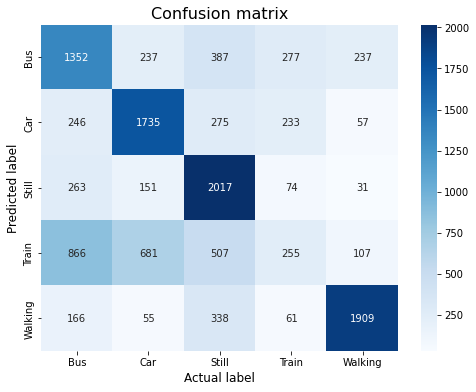

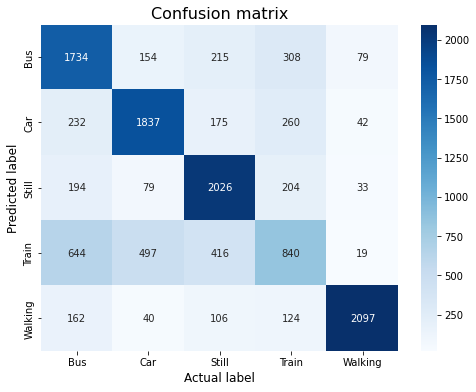

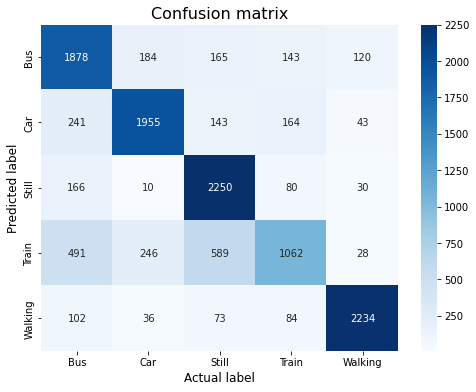

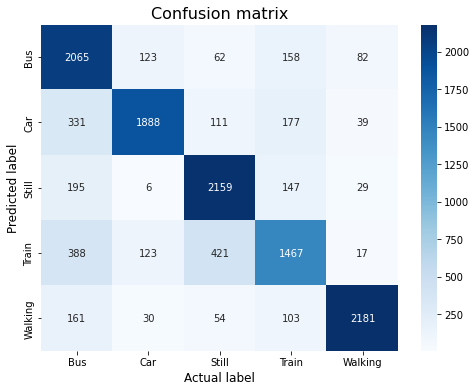

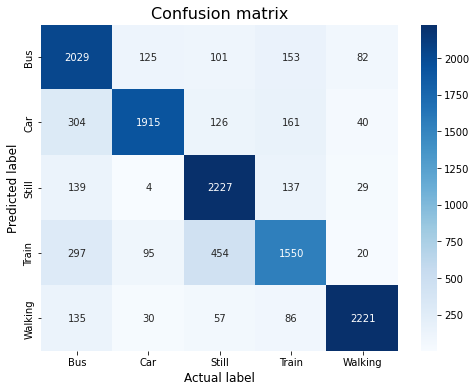

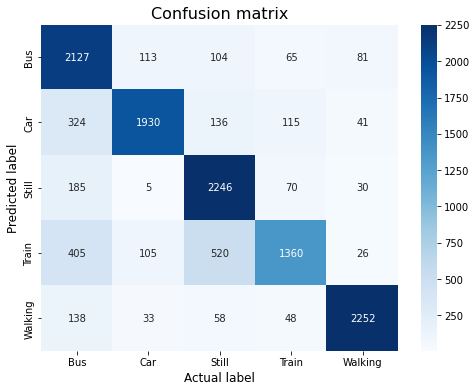

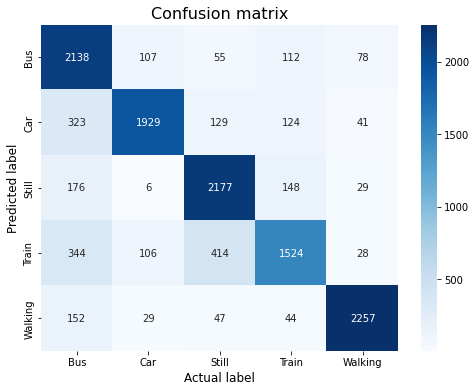

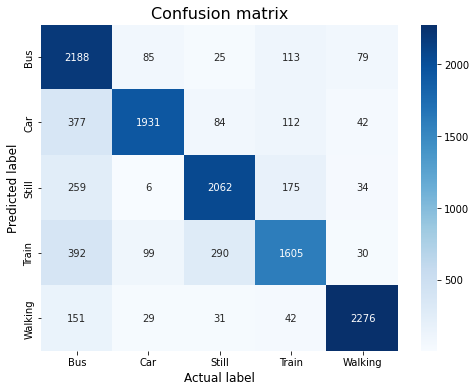

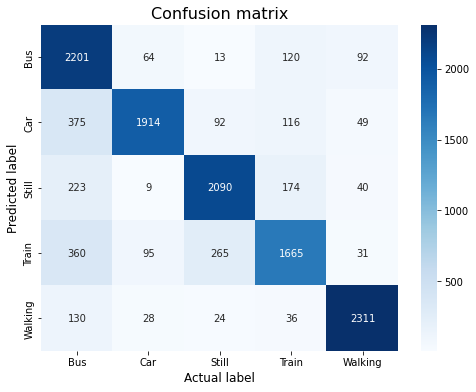

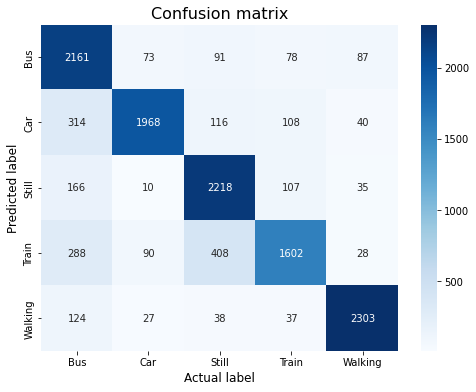

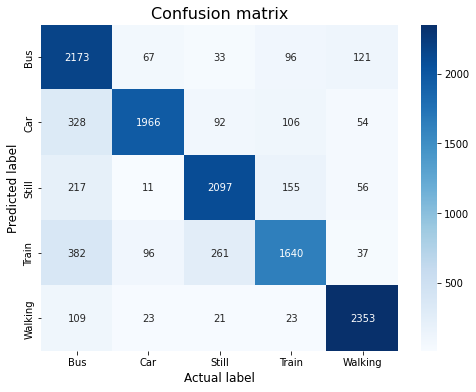

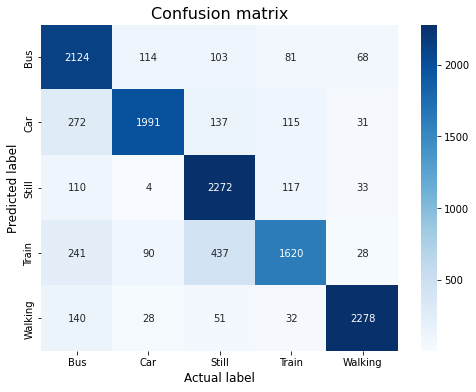

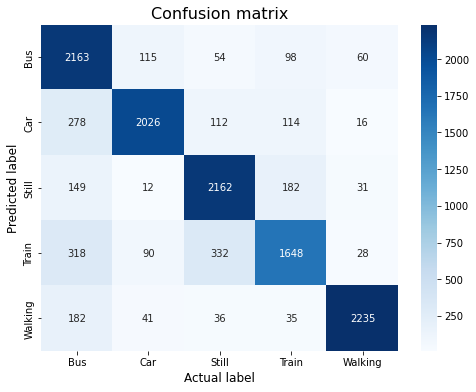

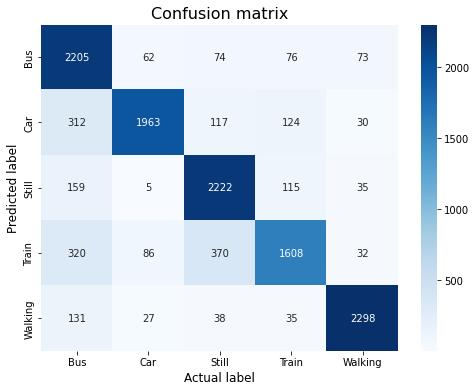

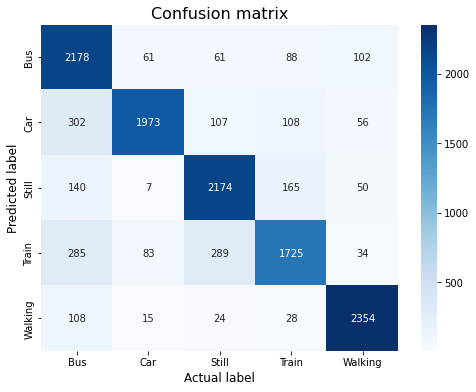

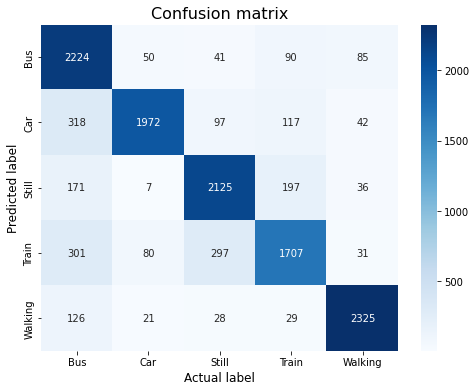

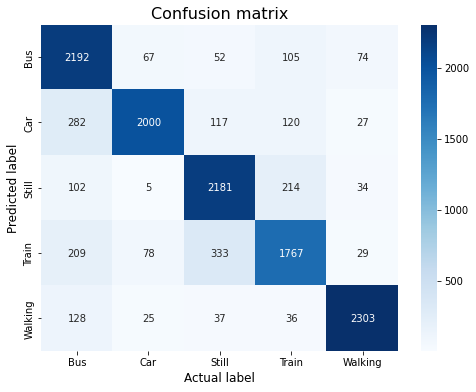

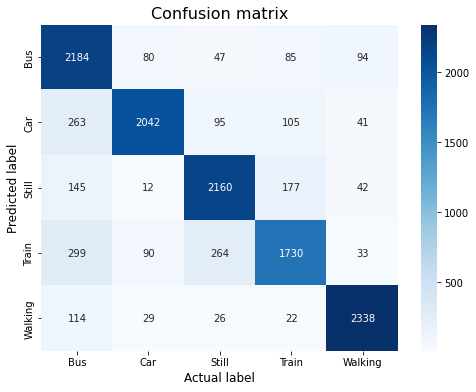

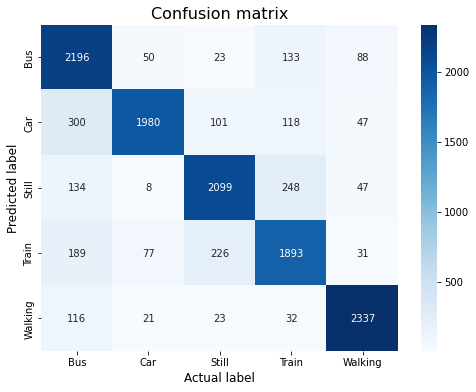

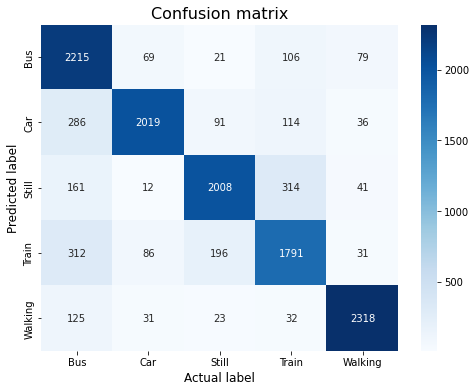

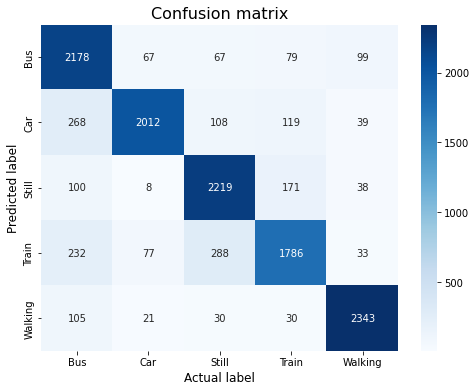

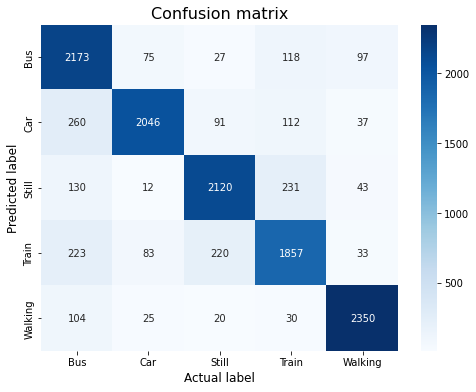

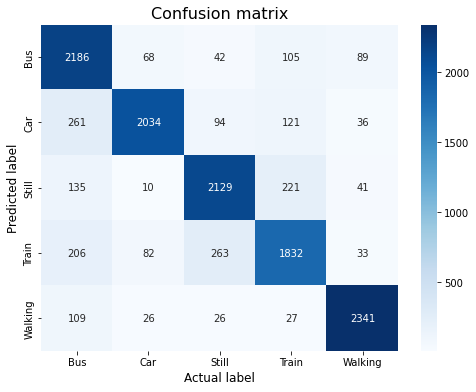

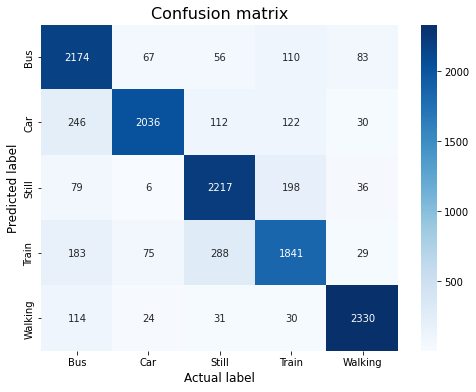

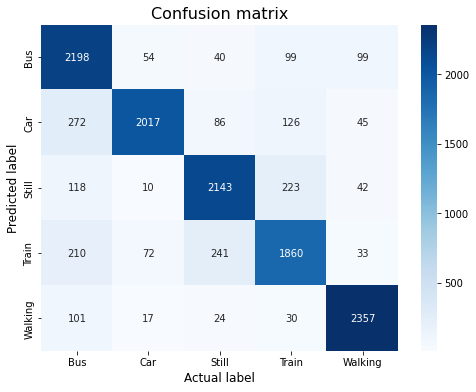

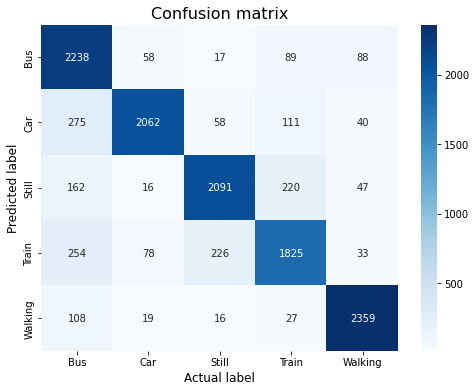

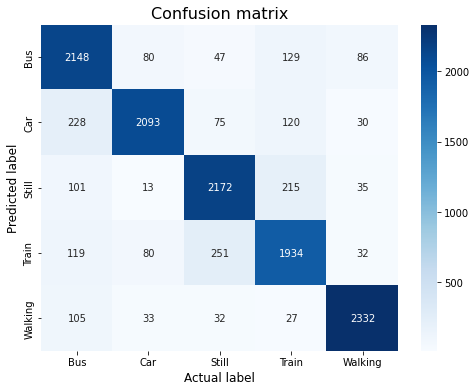

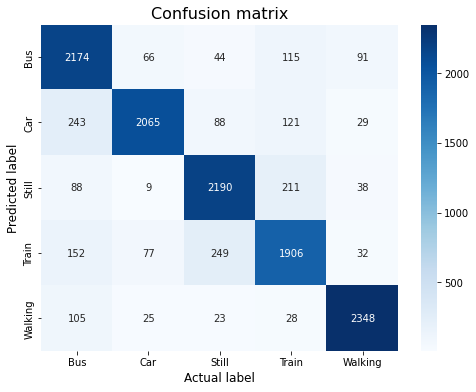

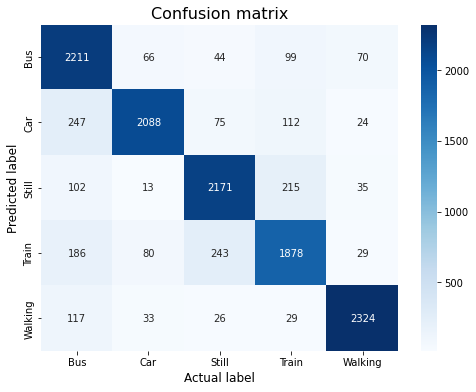

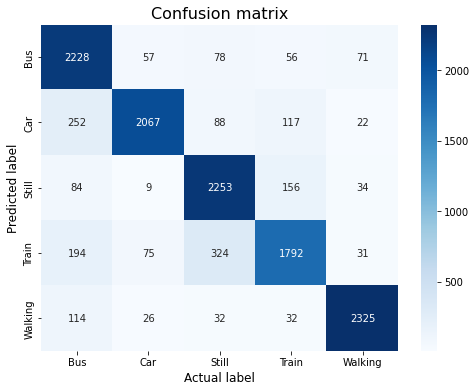

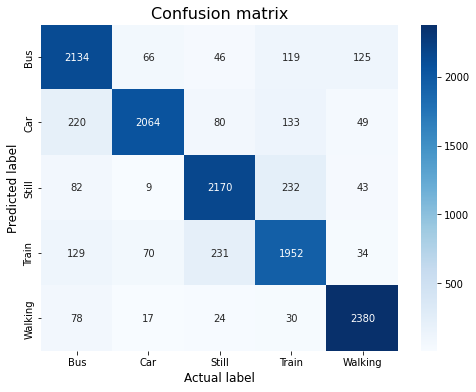

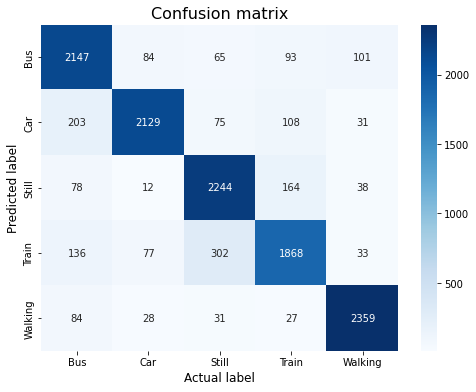

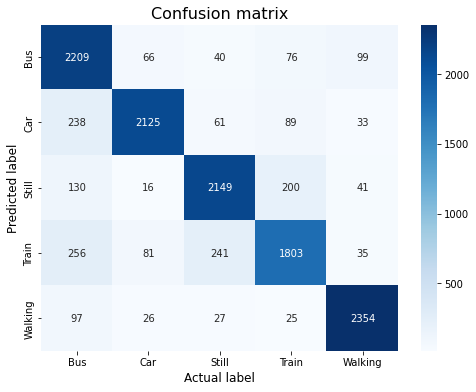

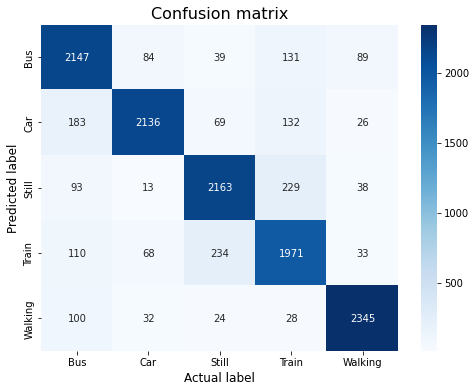

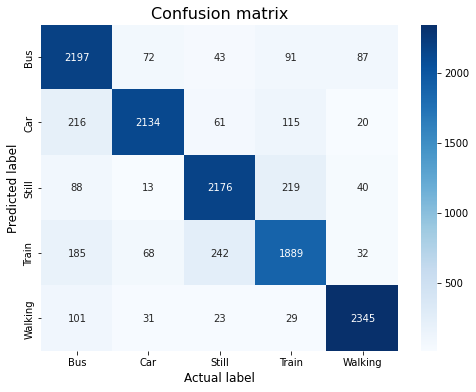

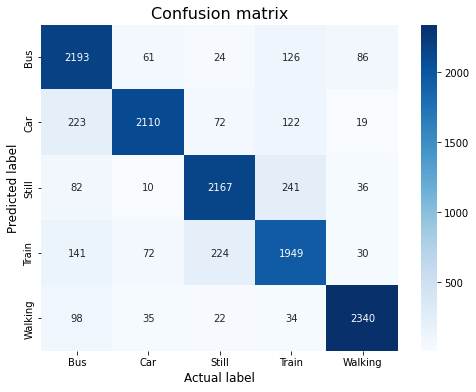

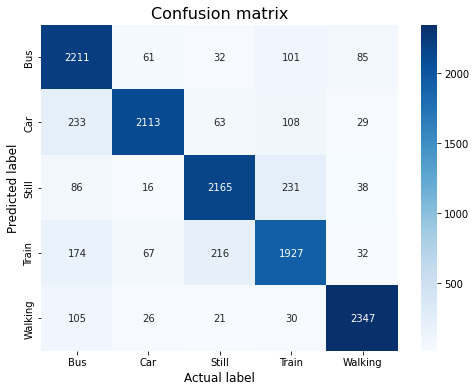

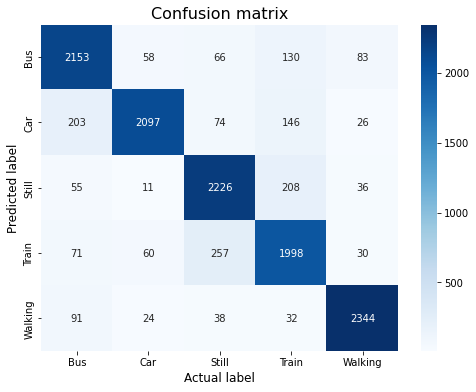

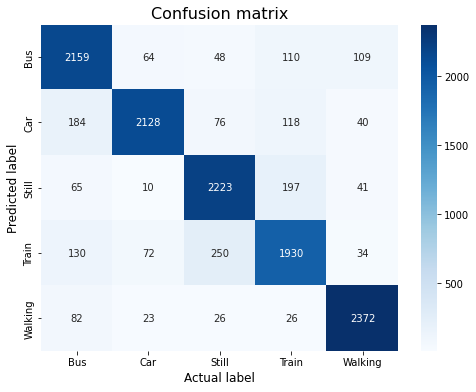

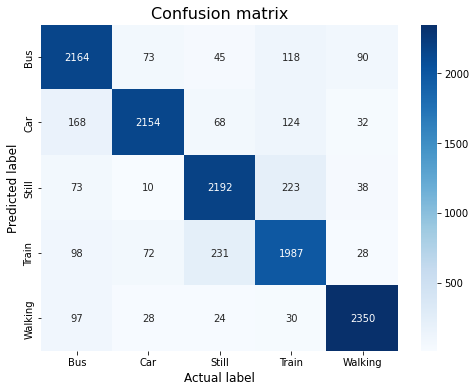

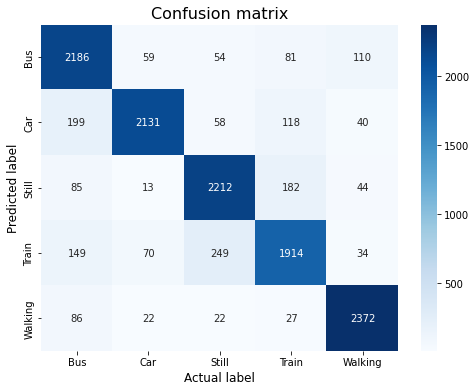

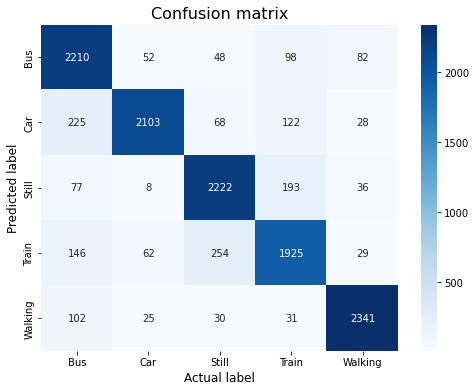

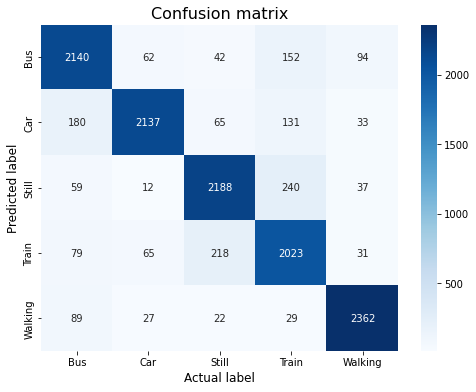

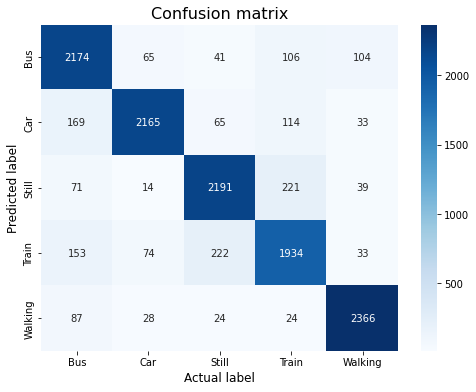

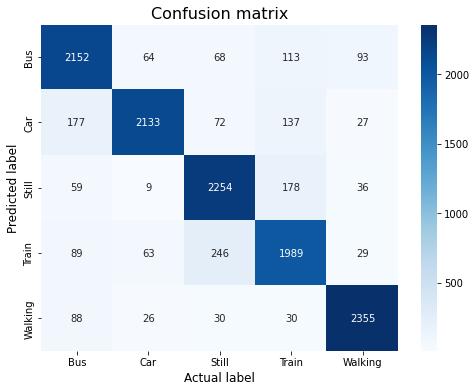

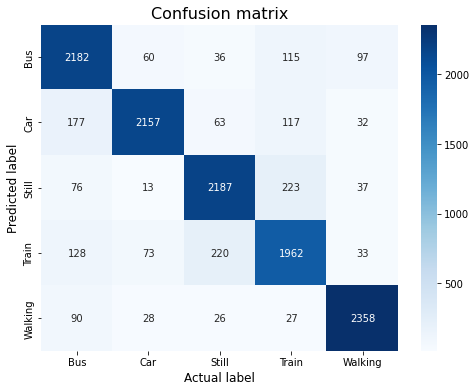

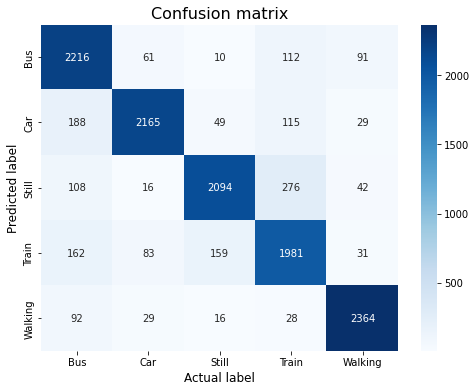

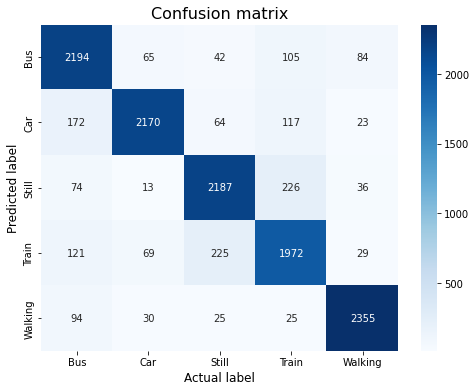

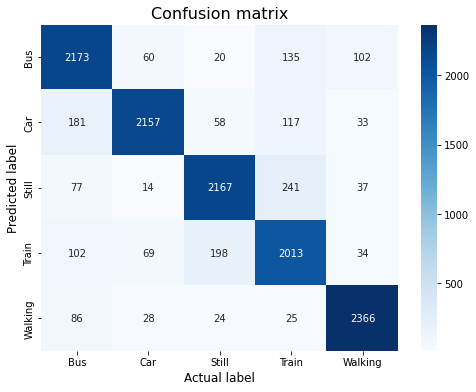

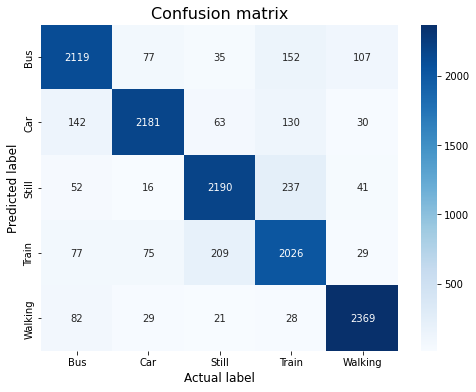

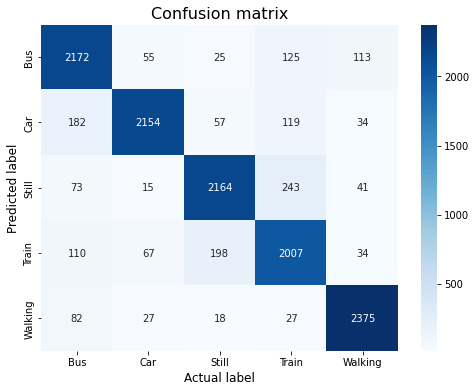

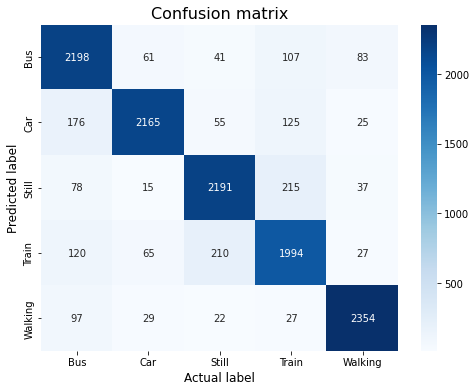

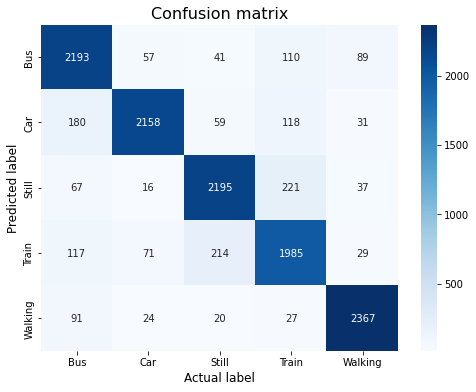

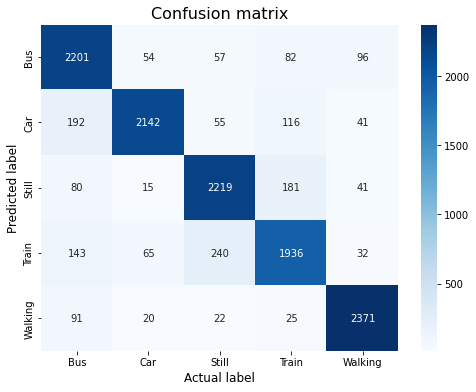

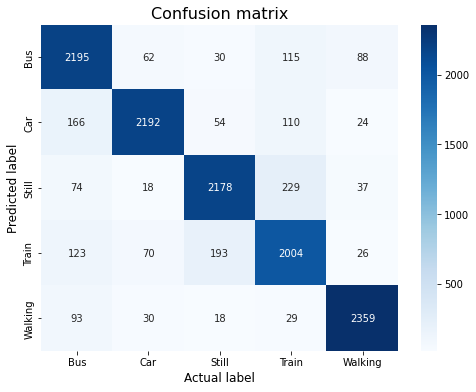

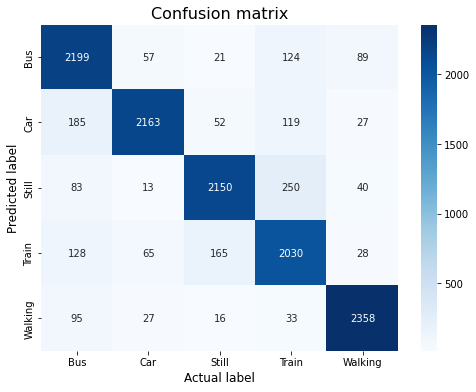

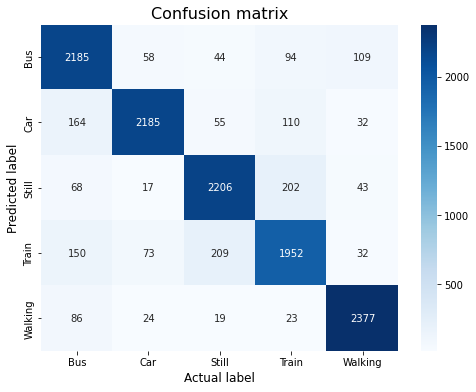

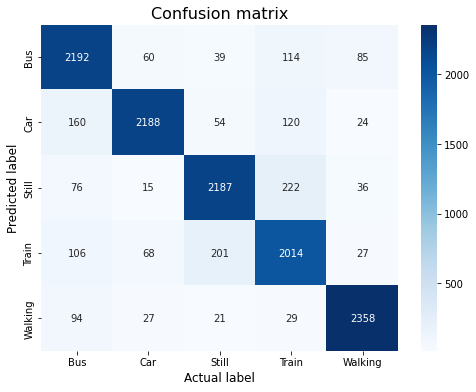

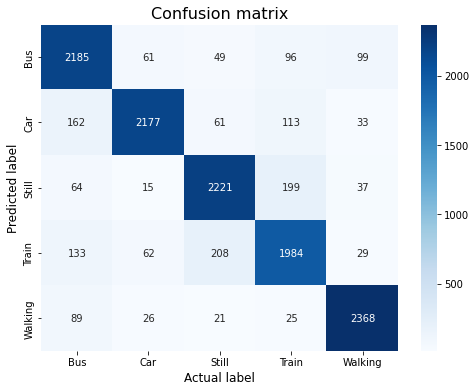

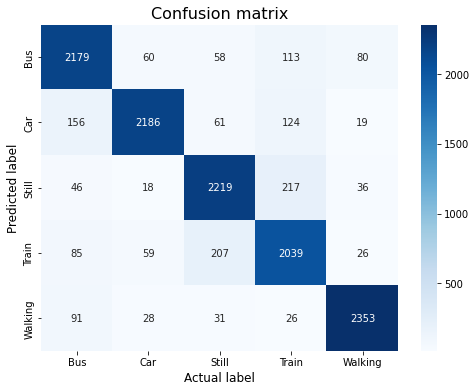

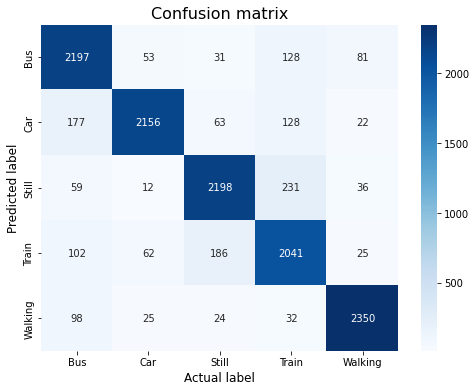

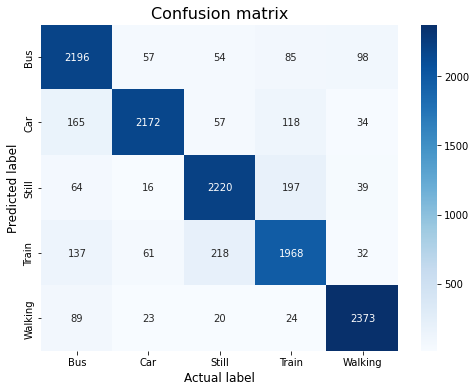

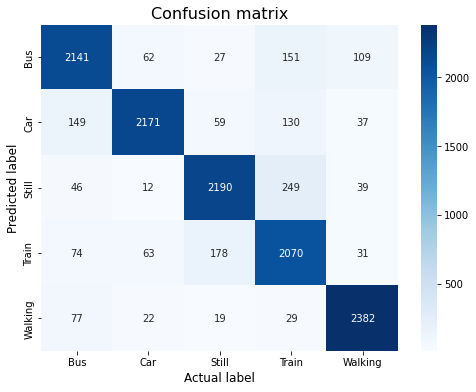

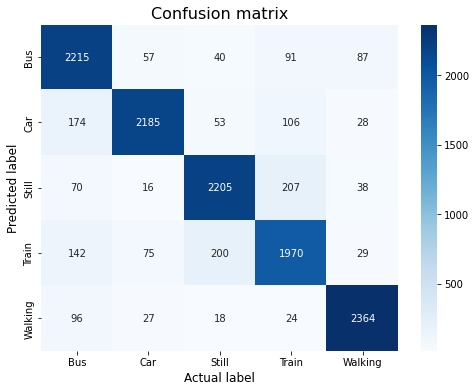

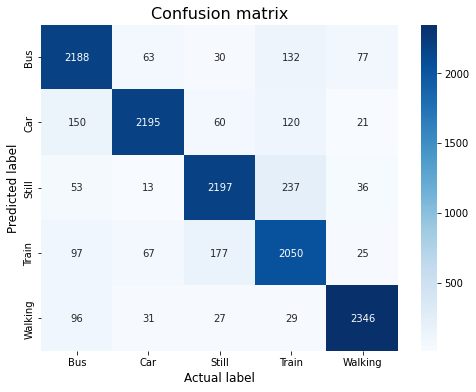

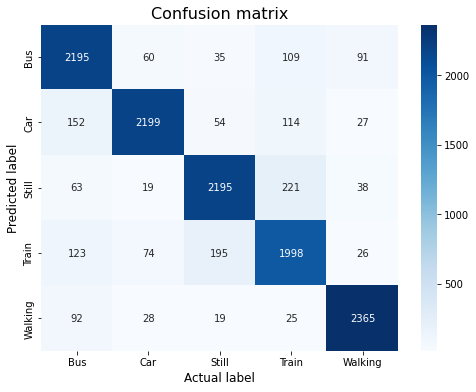

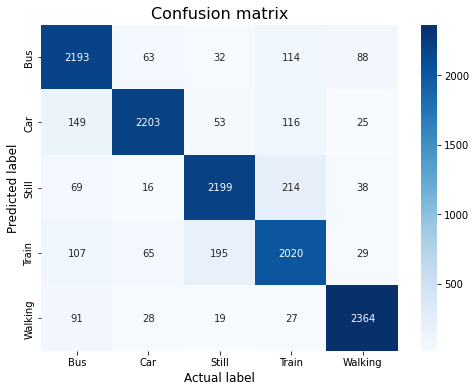

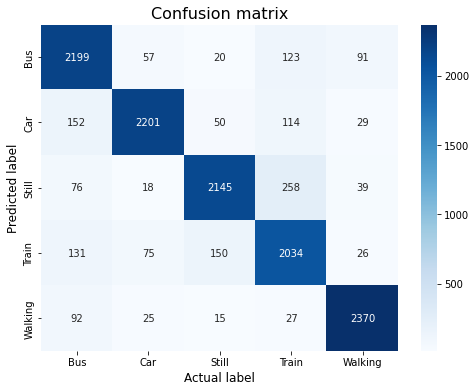

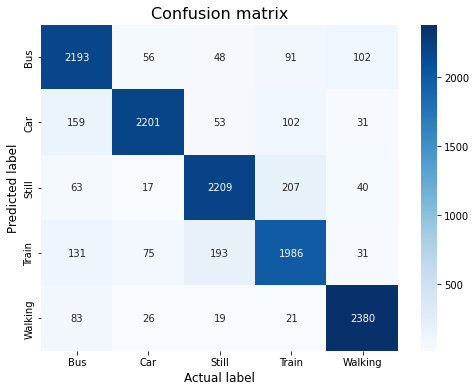

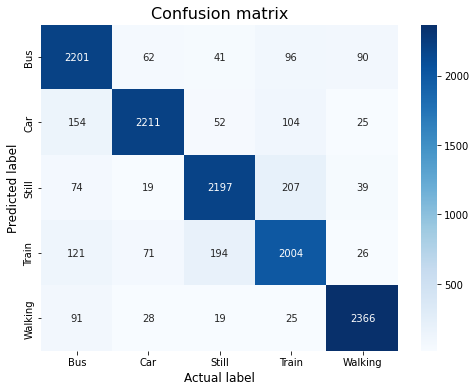

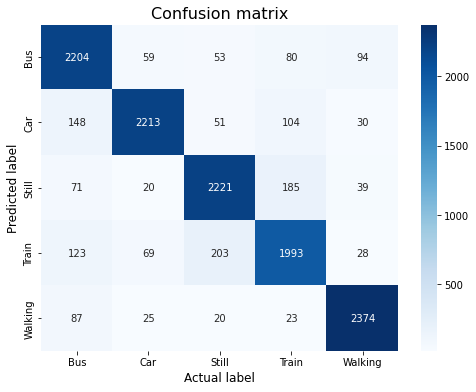

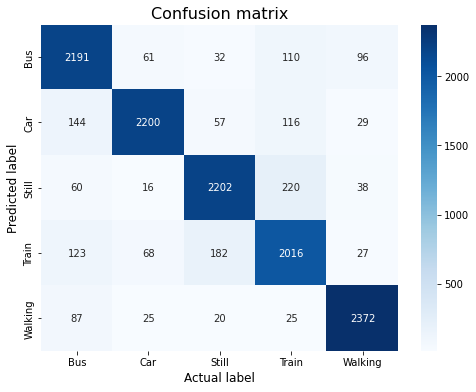

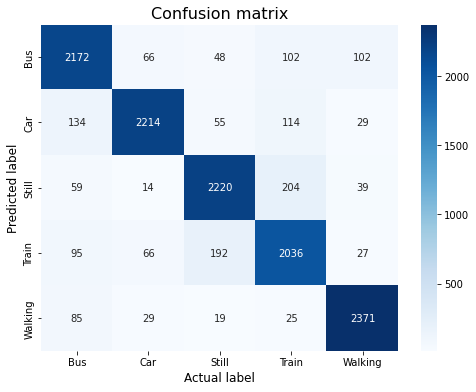

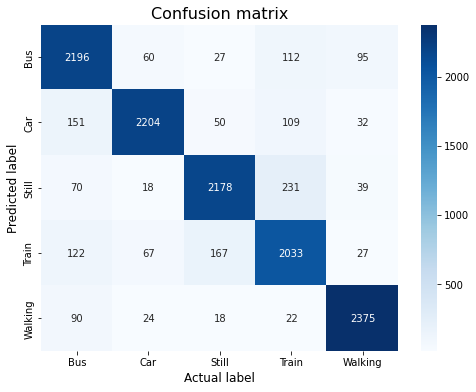

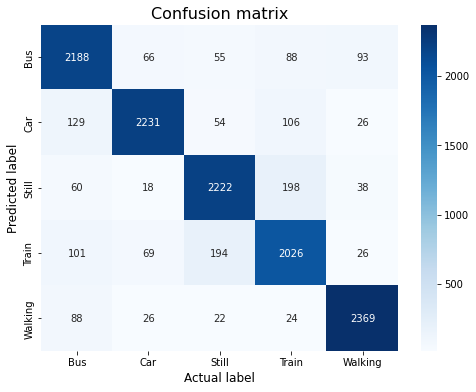

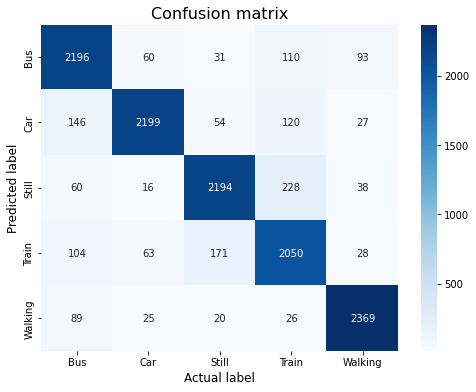

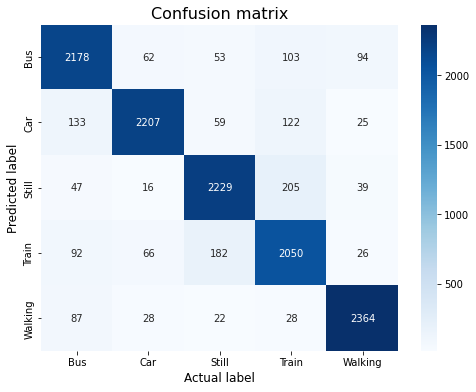

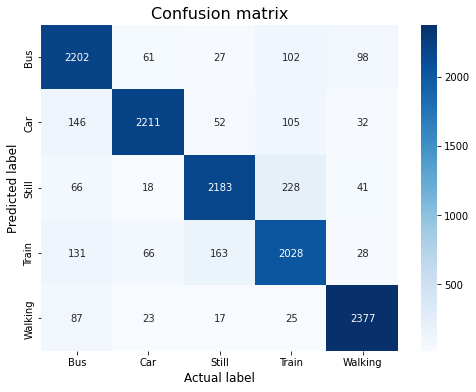

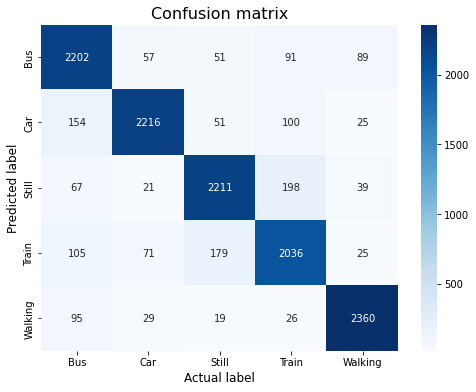

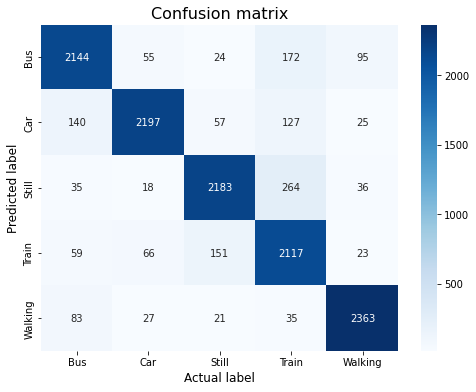

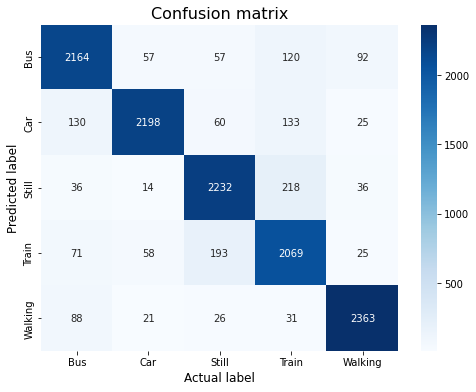

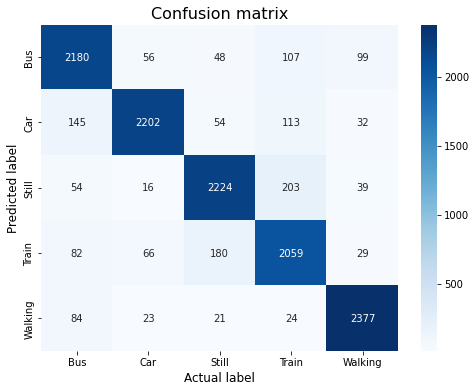

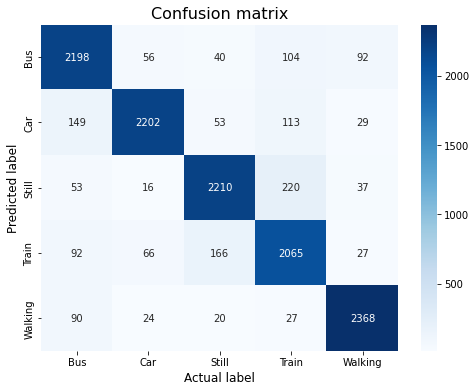

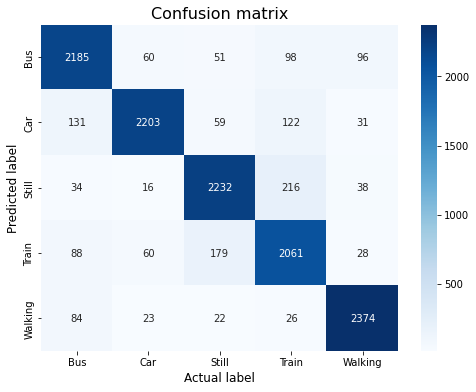

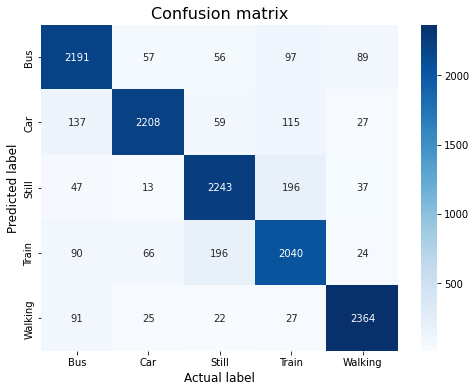

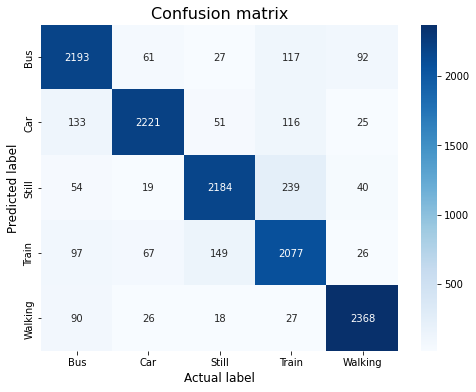

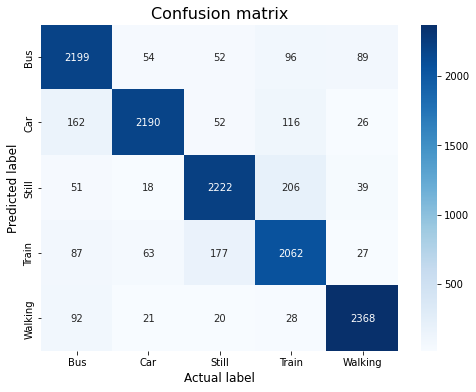

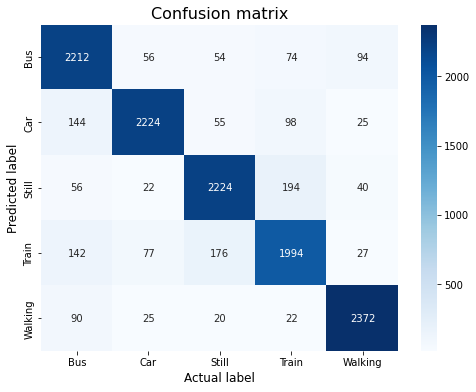

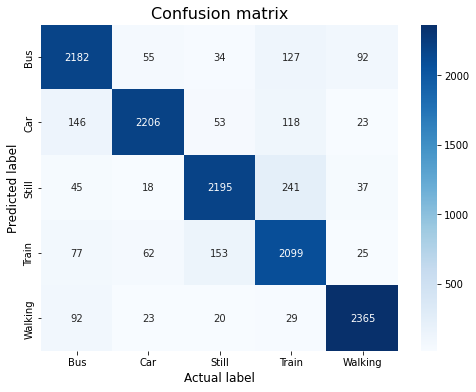

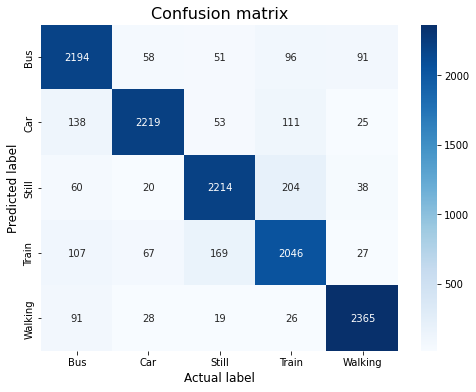

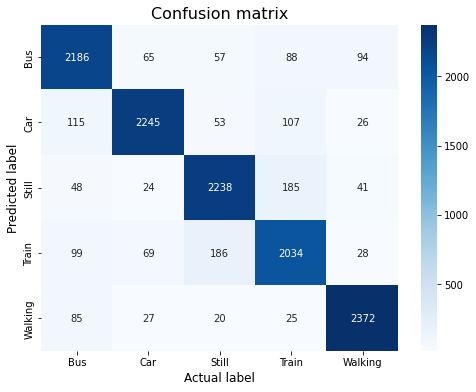

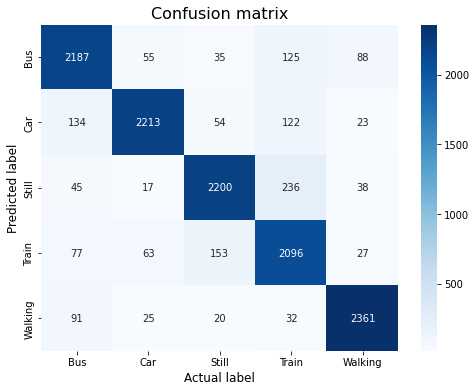

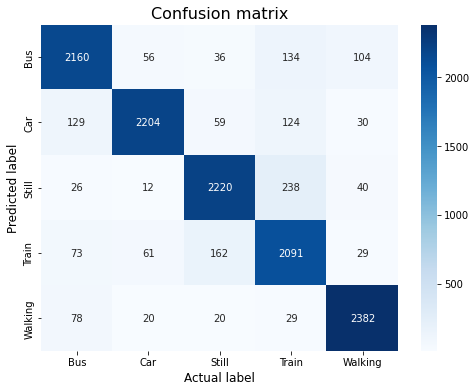

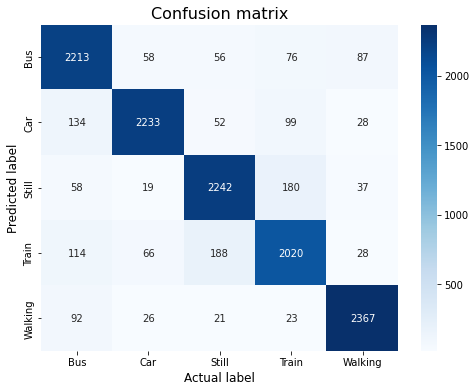

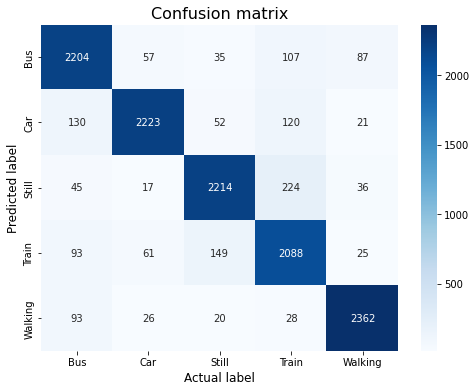

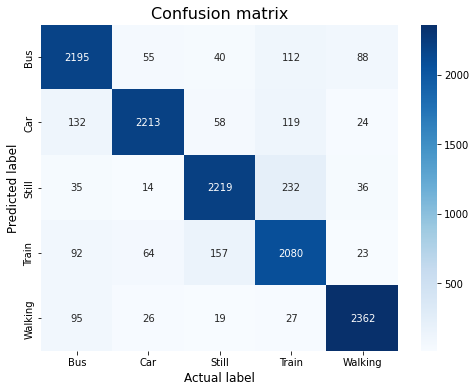

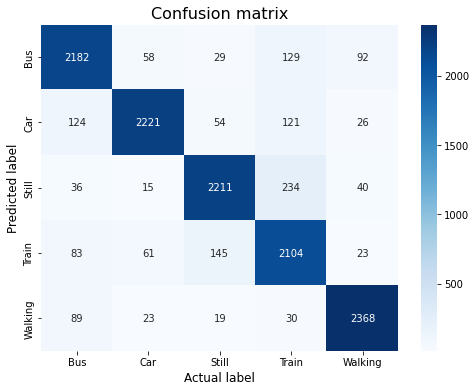

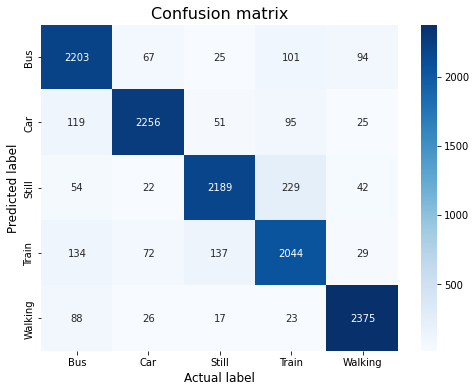

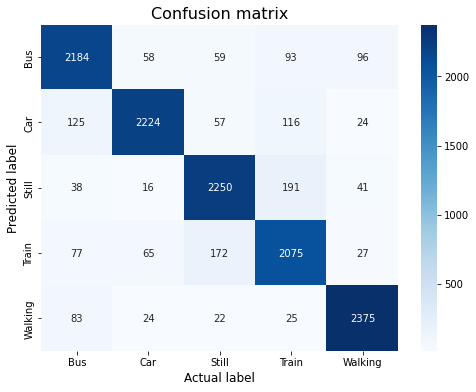

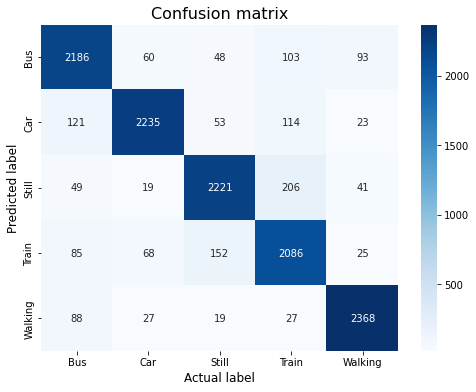

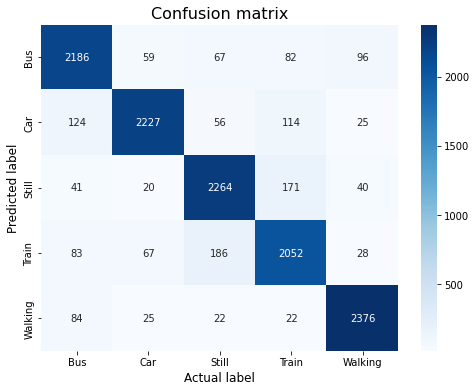

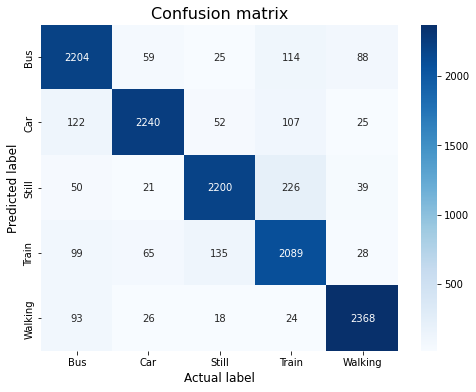

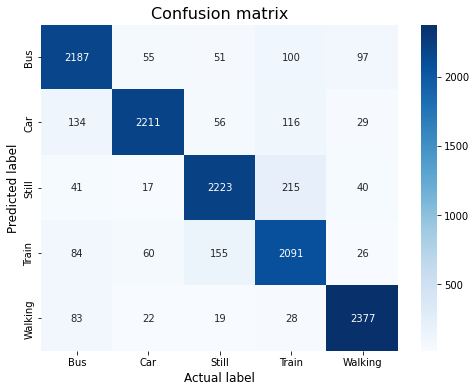

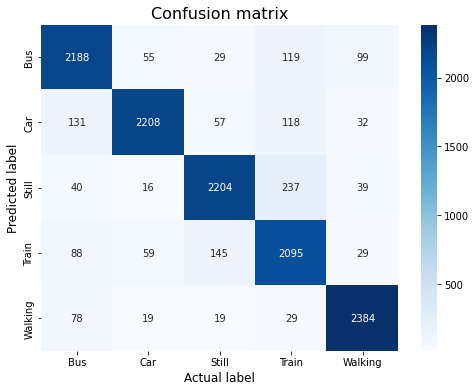

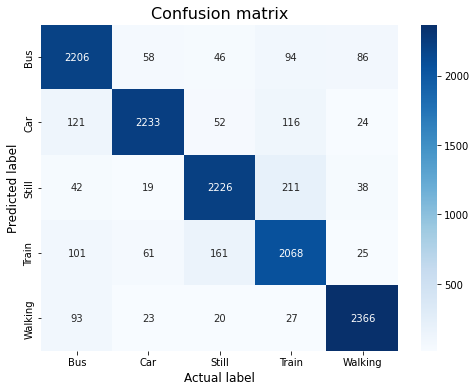

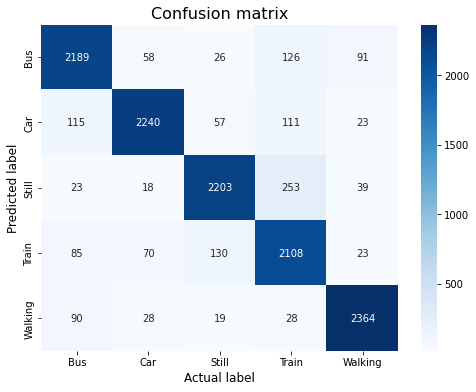

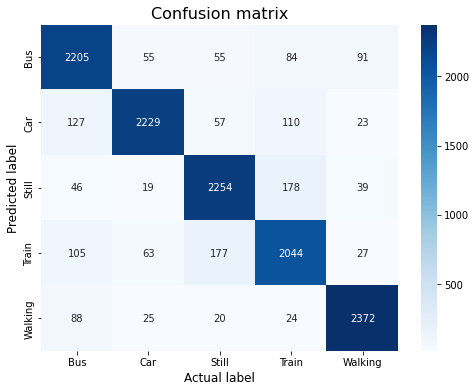

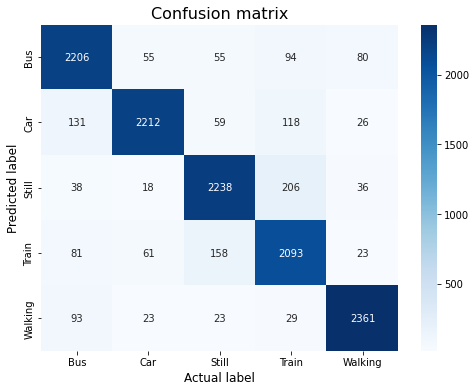

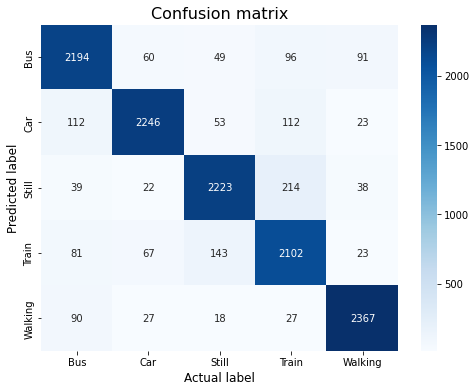

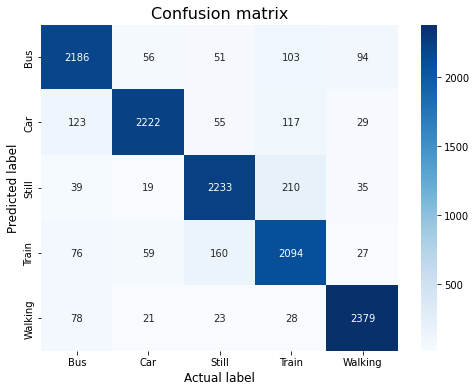

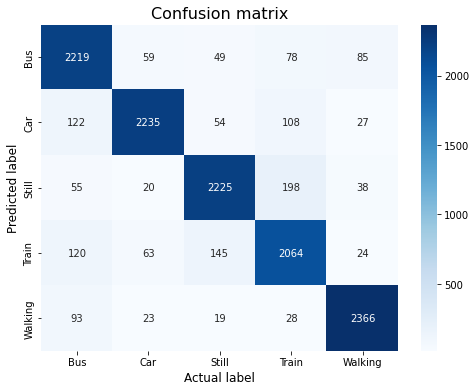

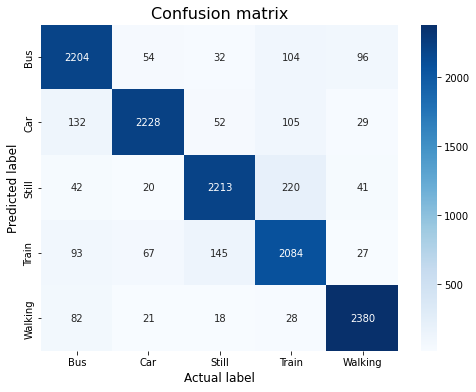

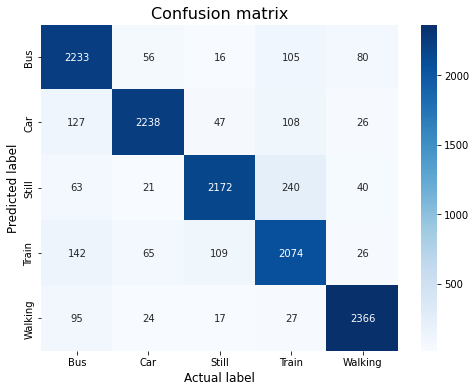

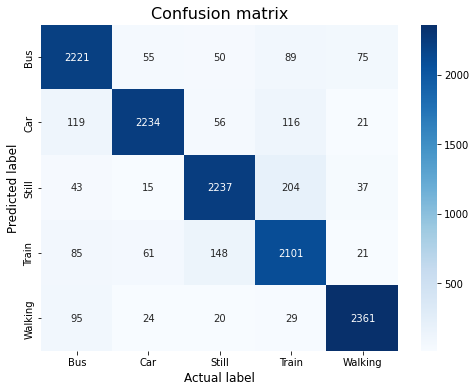

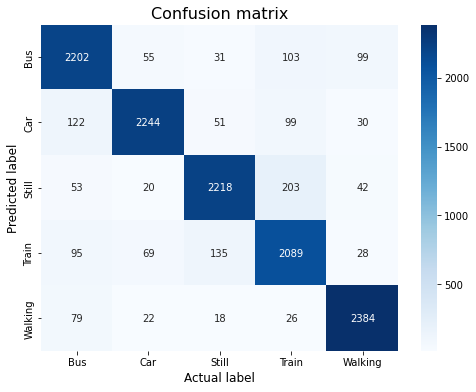

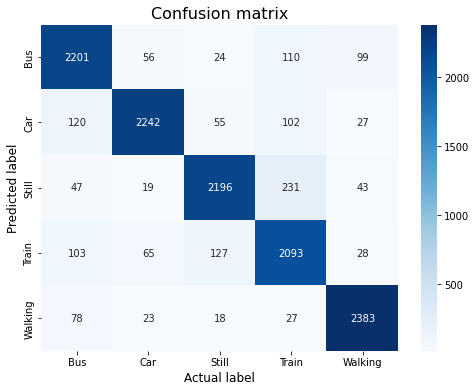

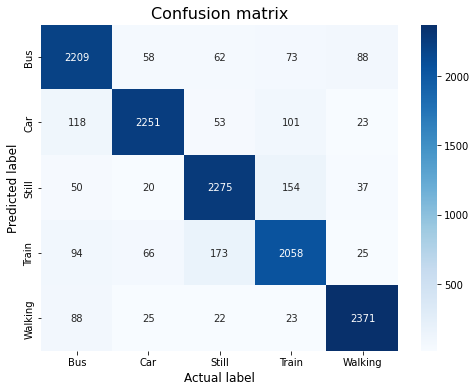

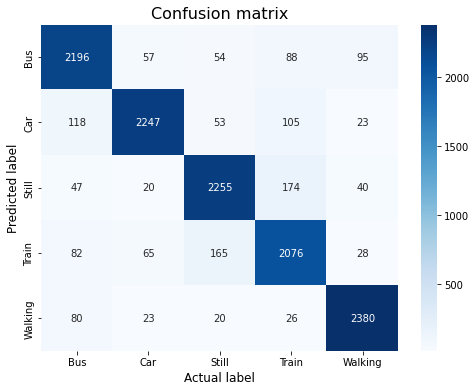

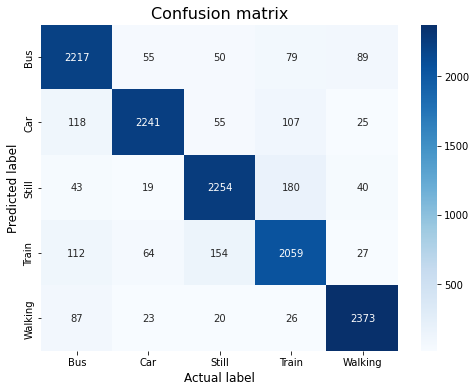

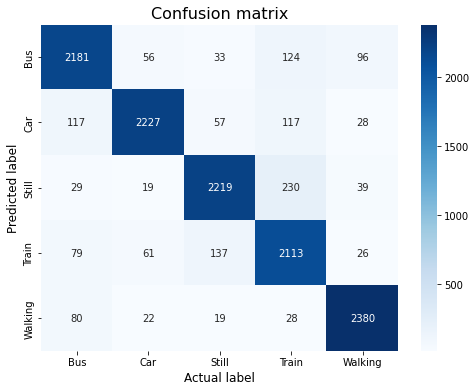

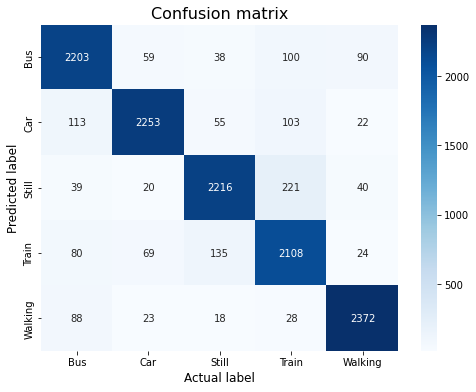

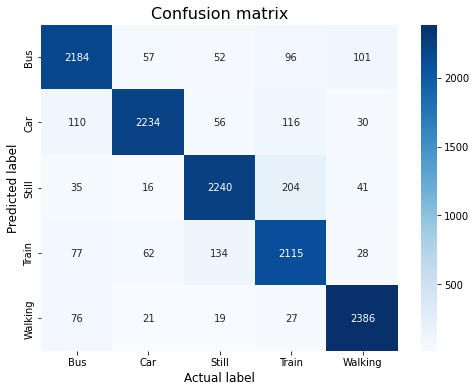

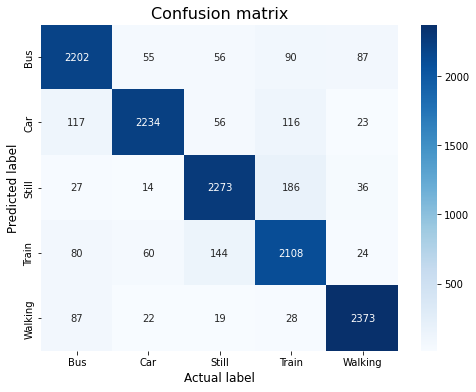

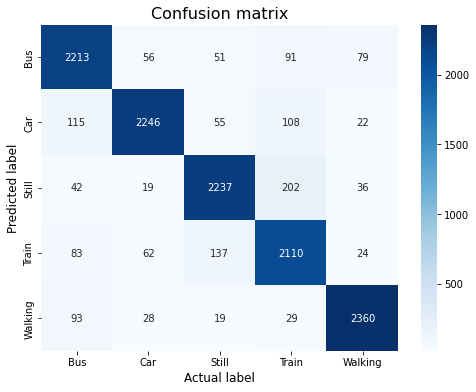

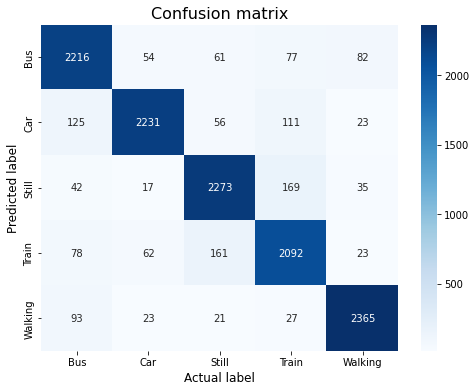

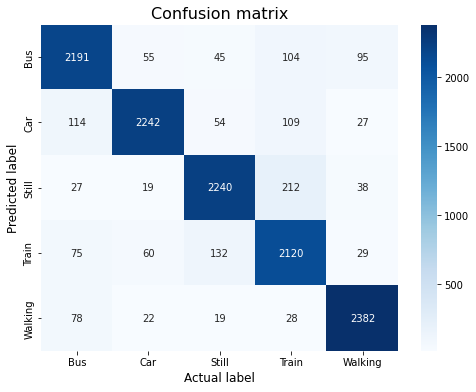

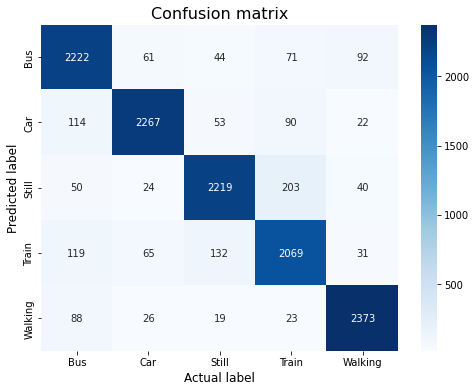

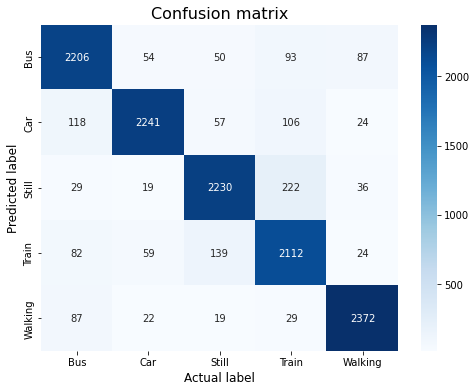

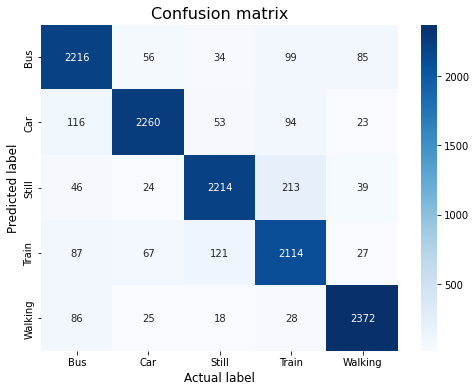

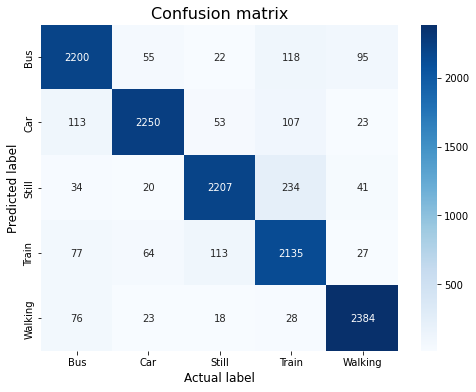

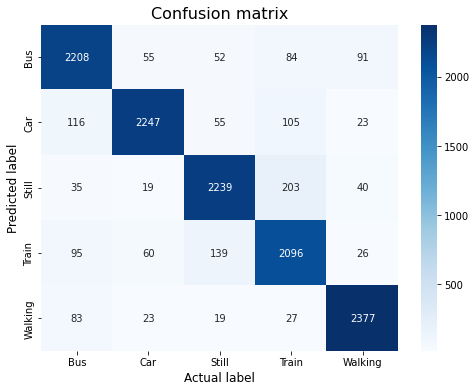

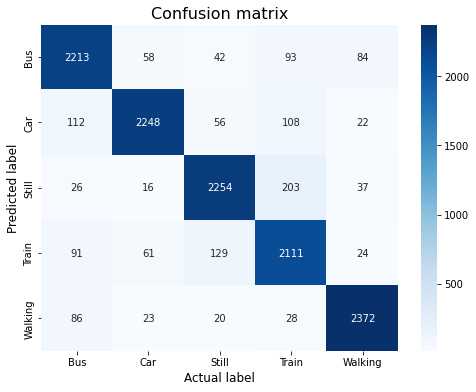

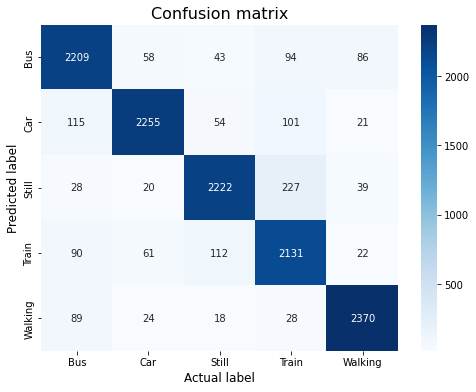

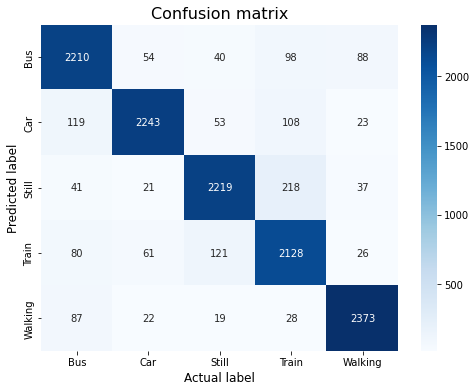

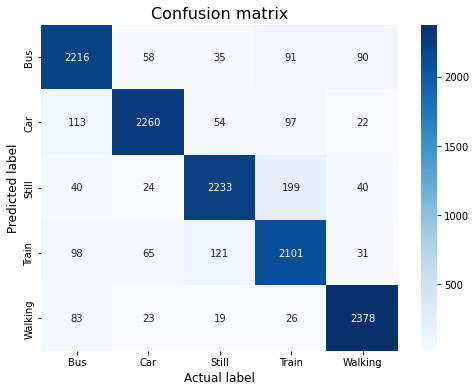

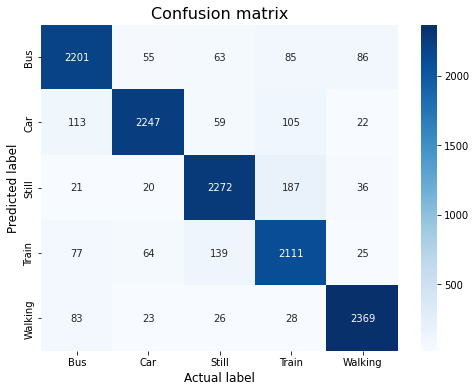

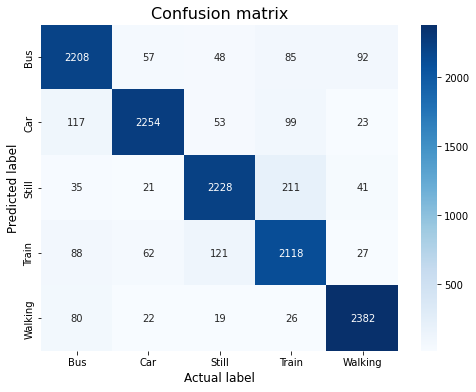

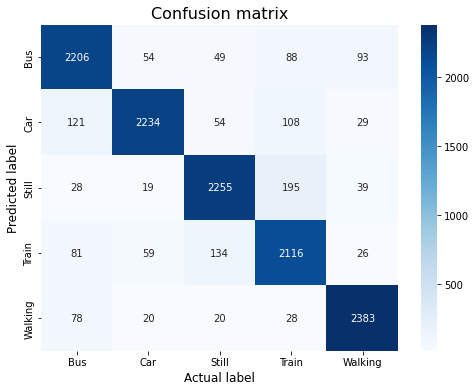

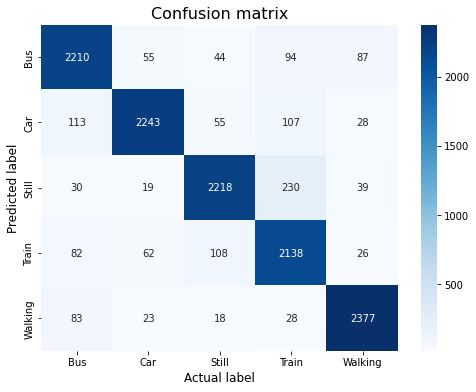

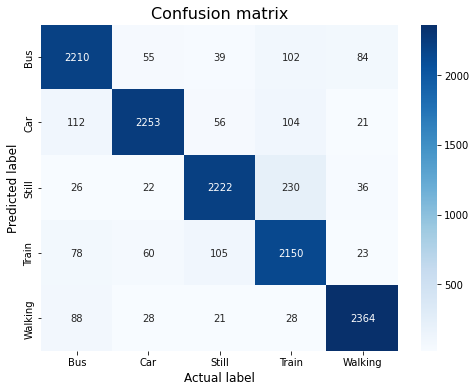

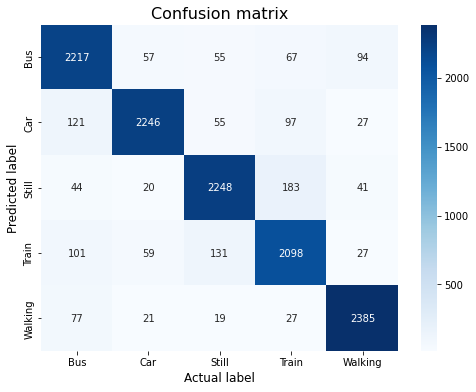

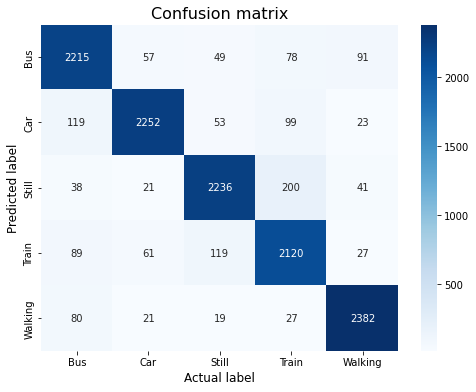

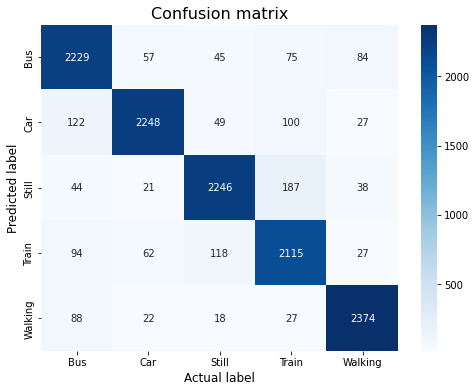

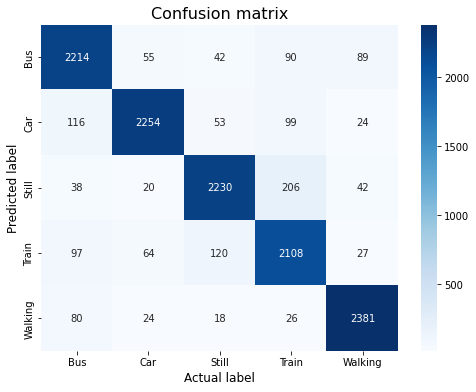

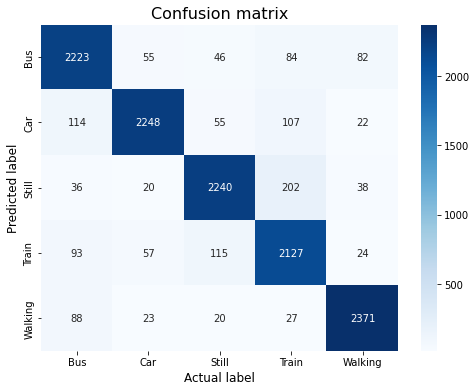

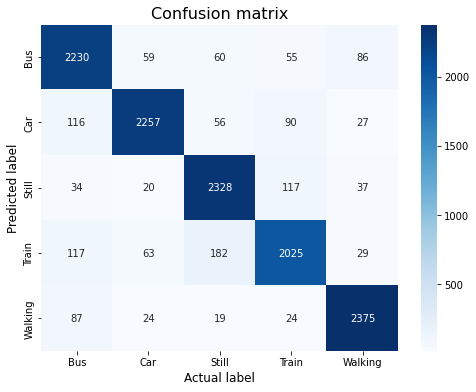

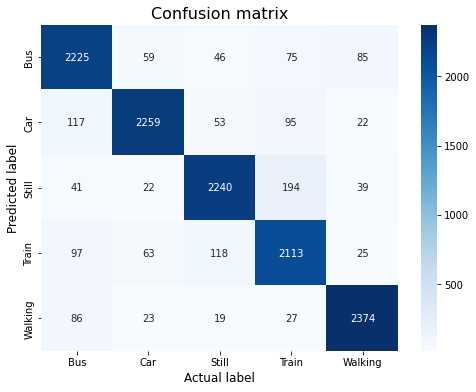

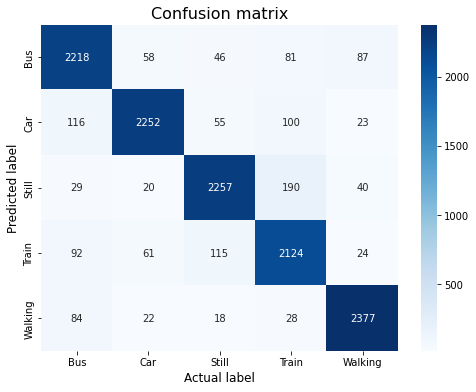

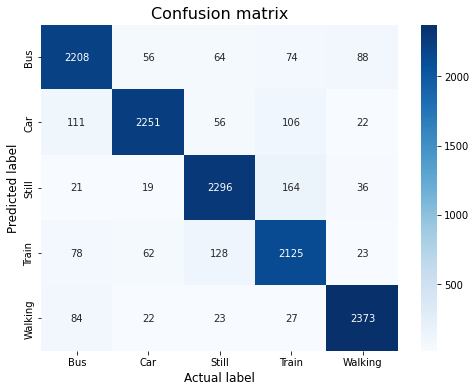

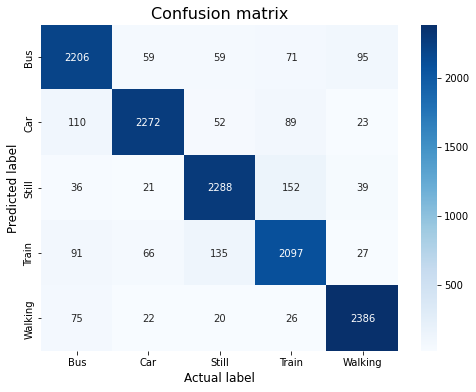

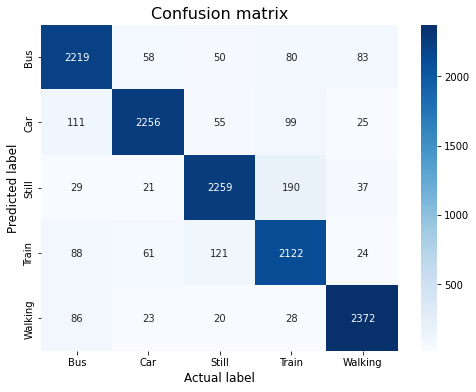

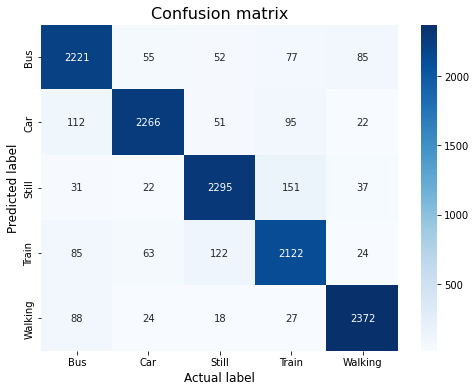

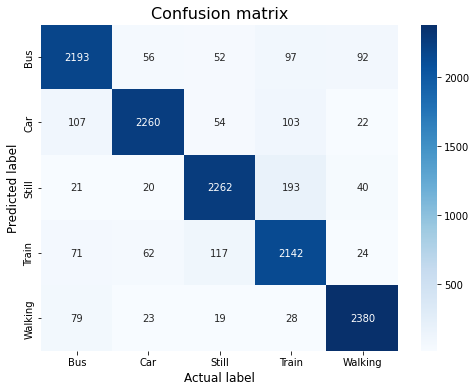

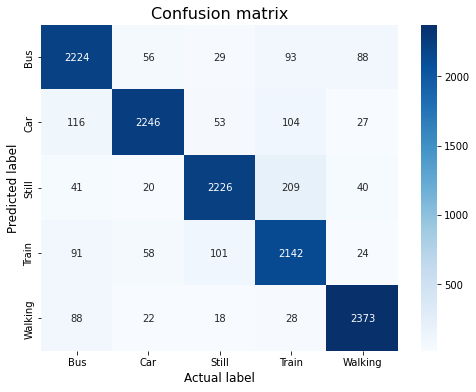

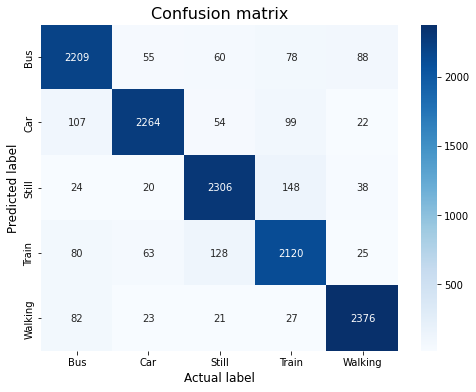

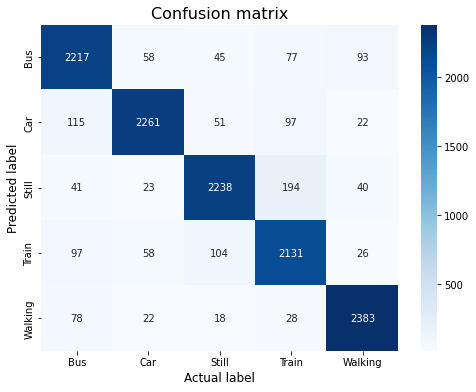

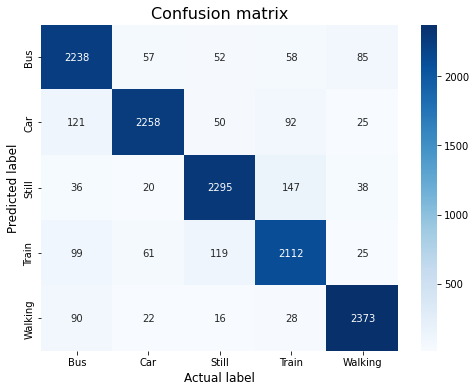

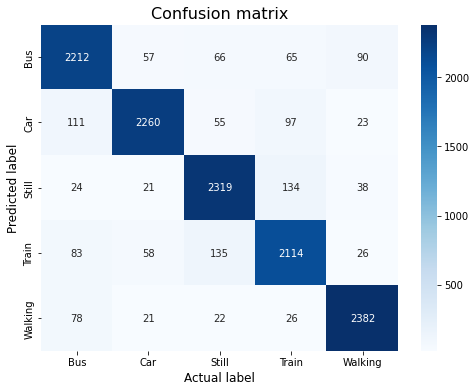

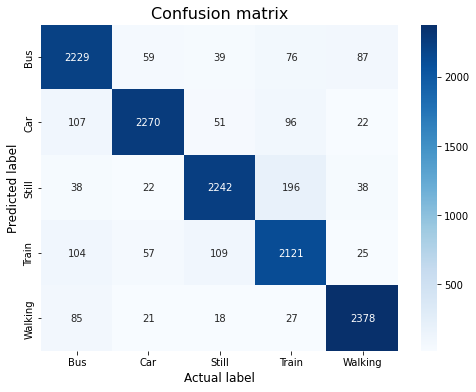

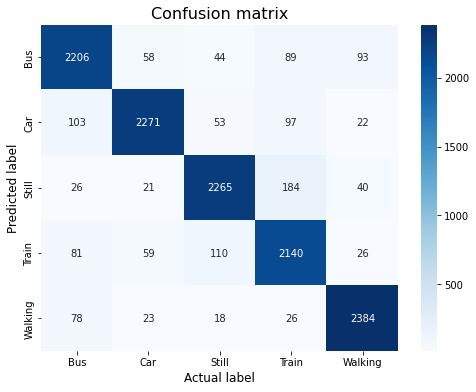

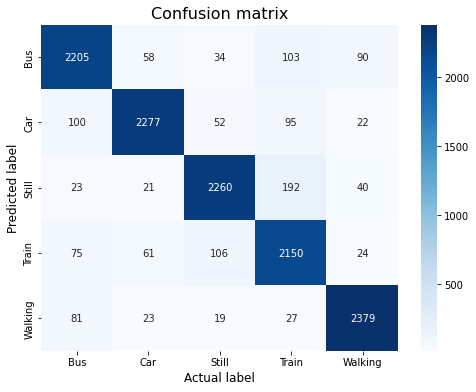

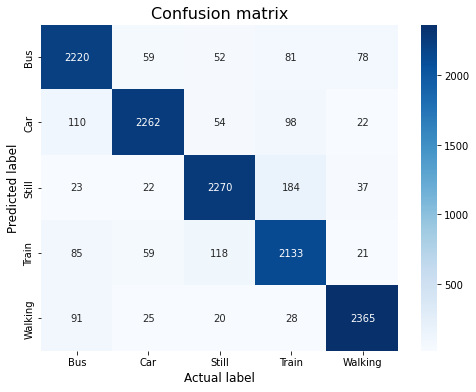

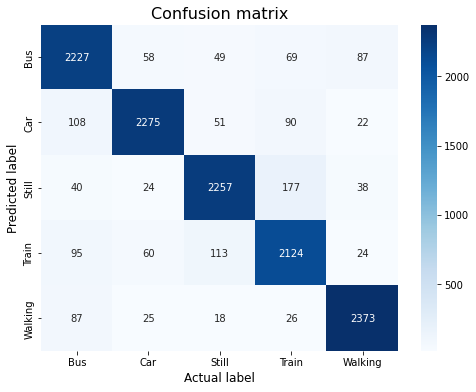

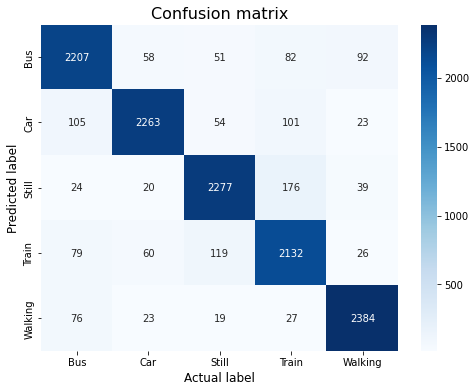

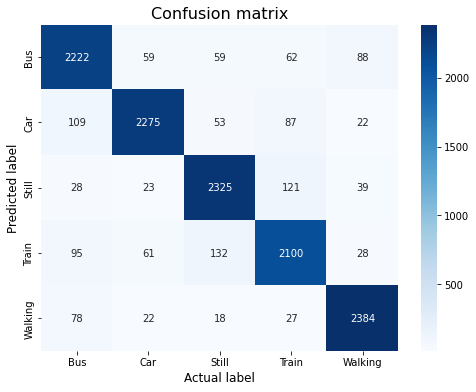

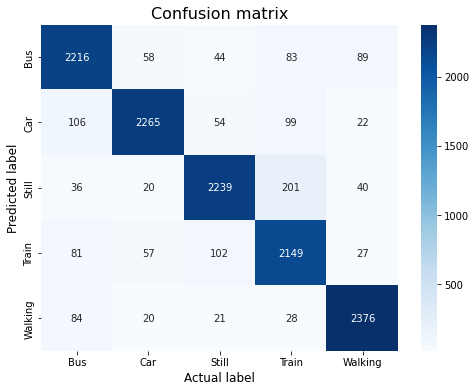

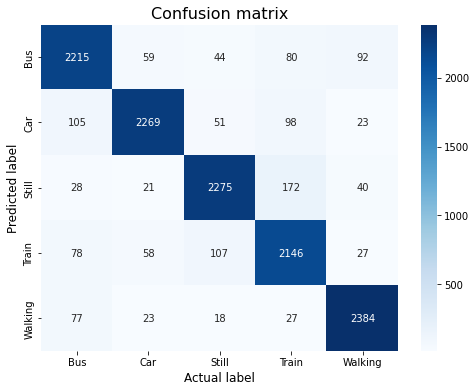

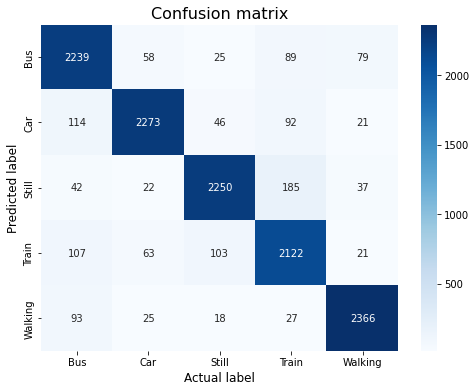

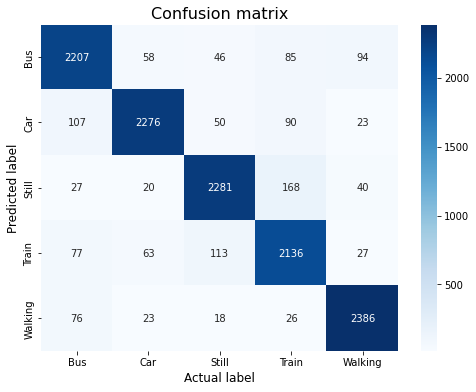

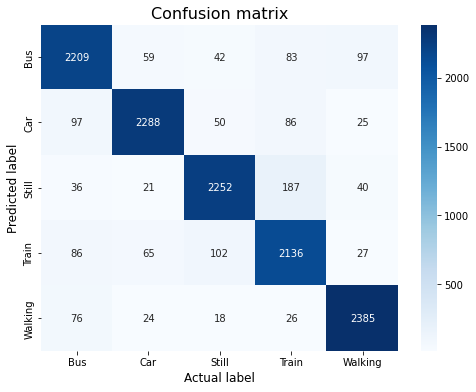

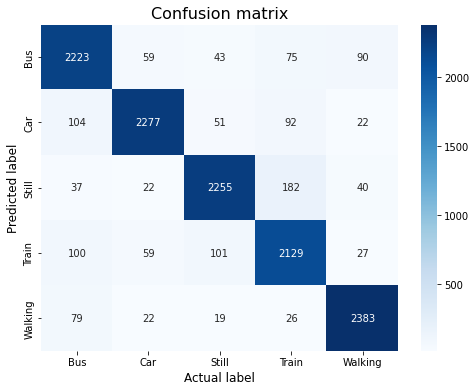

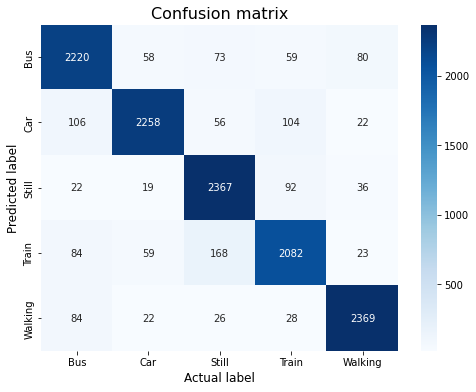

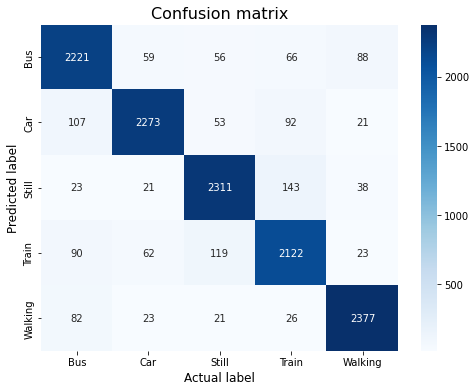

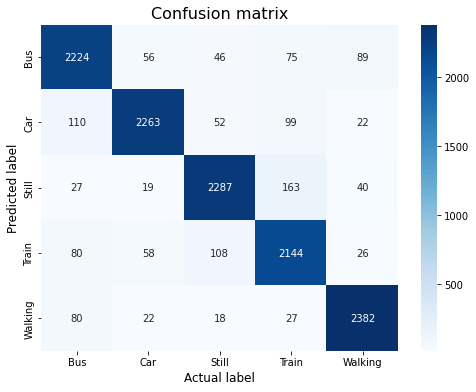

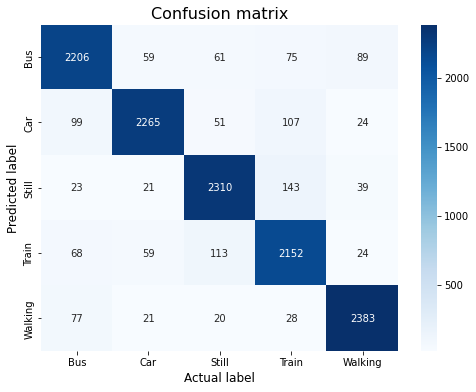

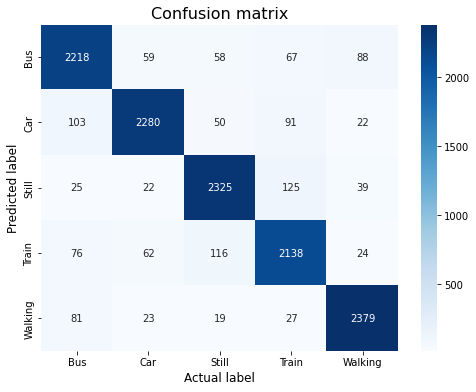

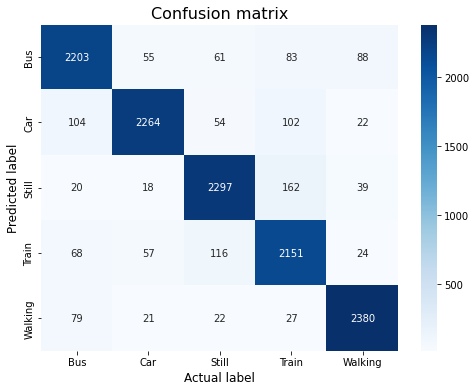

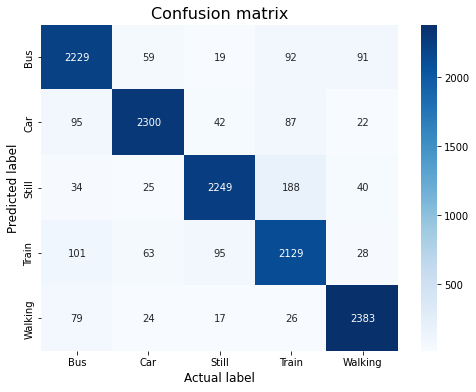

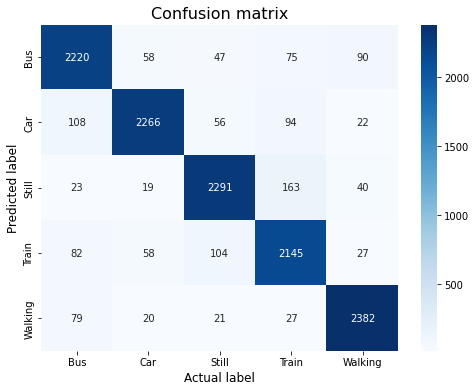

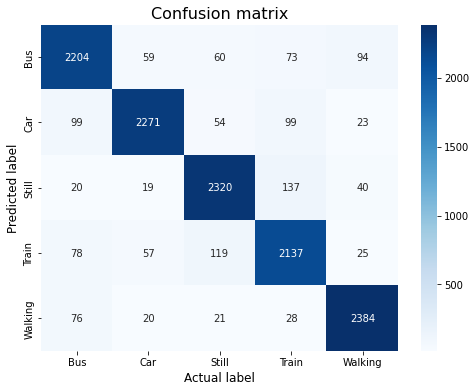

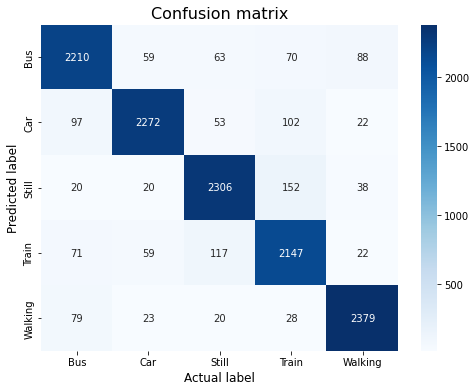

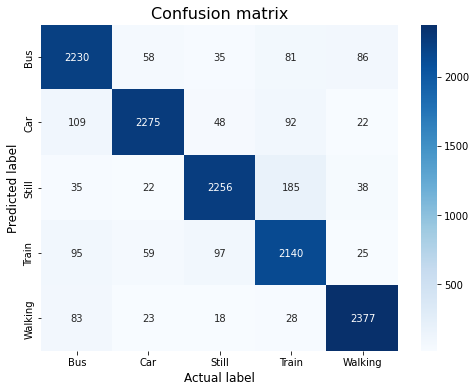

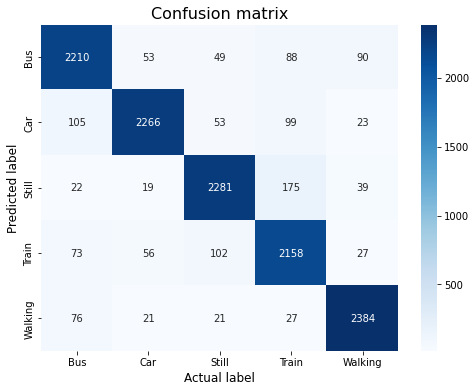

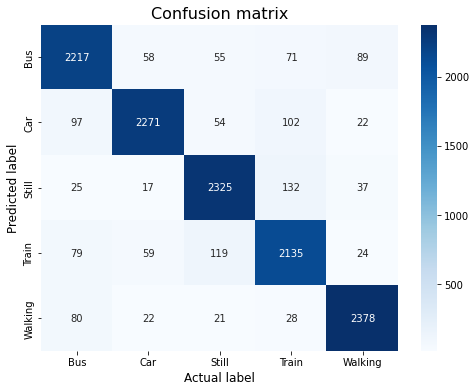

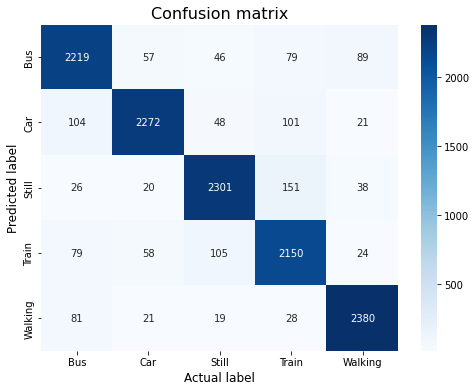

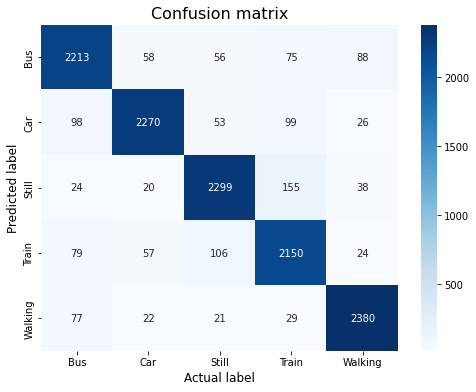

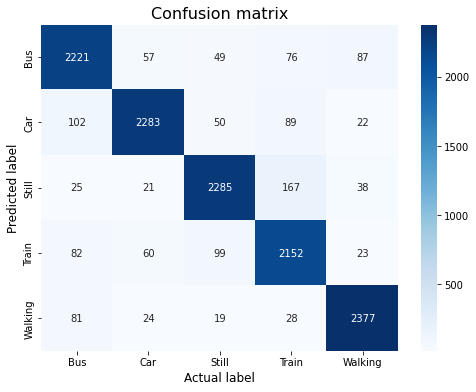

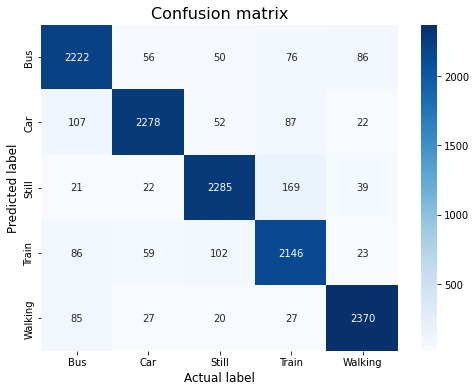

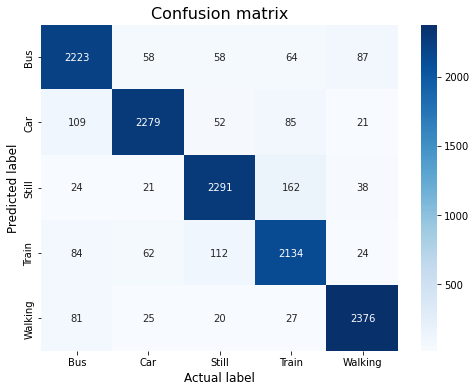

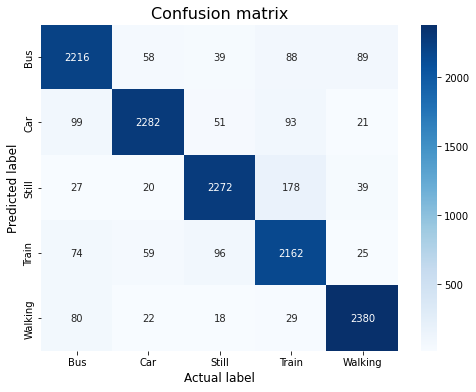

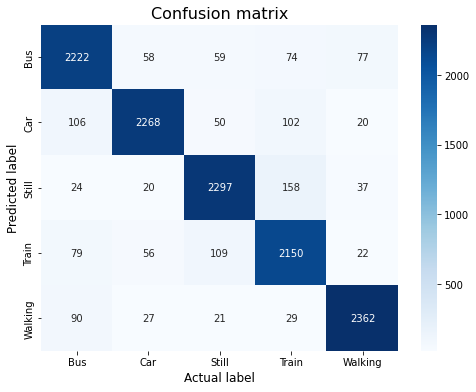

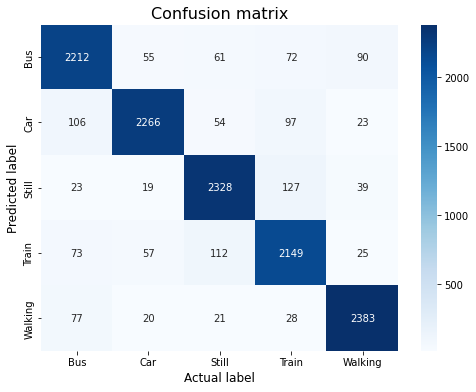

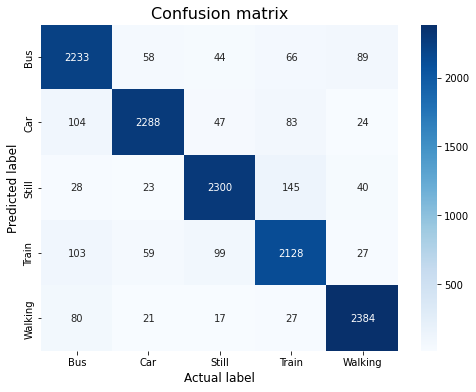

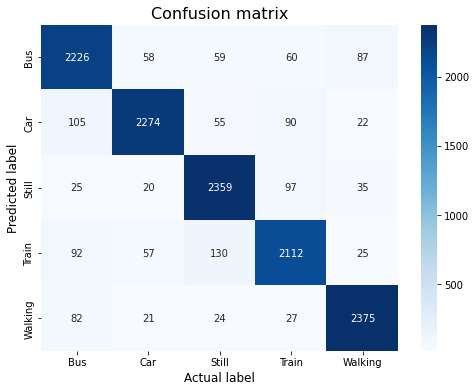

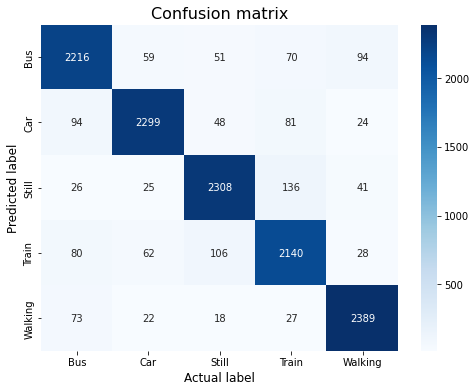

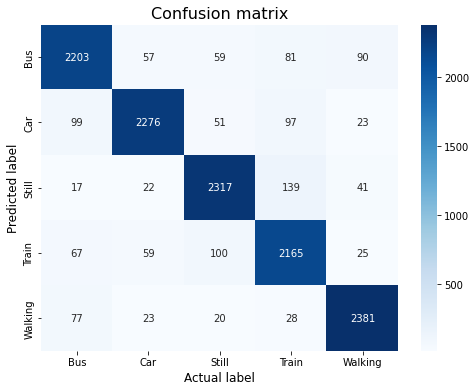

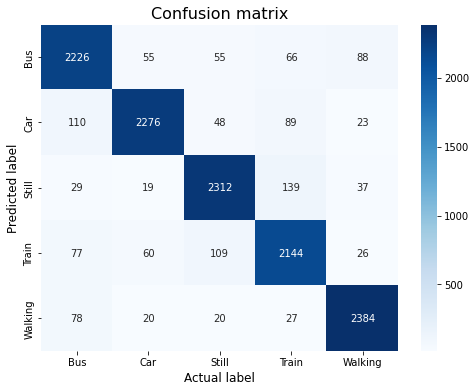

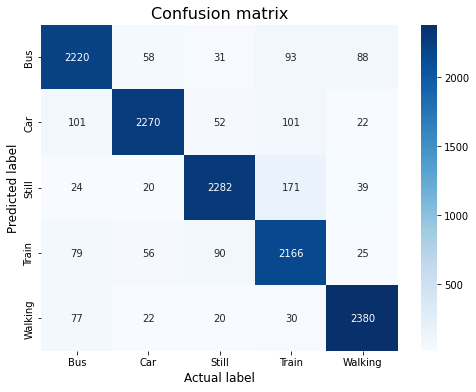

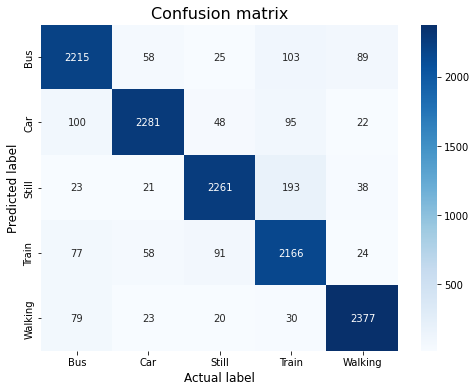

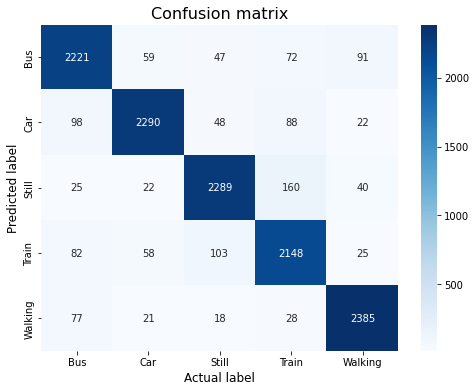

In [ ]:
#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(24, 5)
        
#commence global training loop
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        #print(4)
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(24, 5)
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=1, verbose=1)
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client) 
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    #print(average_weights)
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)